#Bank Customer Churn Prediction

## Install Necessary Libraries

In [2]:
pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.9 MB/s et

In [3]:
pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 32.2

In [4]:
pip install imbalanced-learn

## Import the Data

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from pycaret.classification import *
from sklearn.cluster import KMeans


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/Datasets/Bank Customer Churn Prediction.csv'

In [9]:
# a function to revert the dataset back to it's original form
# this will help us when creating models after each feature engineering step
def reset(file_path):
  df = pd.read_csv(file_path)
  # Drop the customer_id column
  df = df.drop(columns=['customer_id'])
  return df

In [10]:
df = reset(file_path)

In [11]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

### Basic Descriptive Statistics

In [ ]:
# Summary stats of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
products_number,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [ ]:
# Summary stats of categorical features
df.describe(include='object').T

,count,unique,top,freq
country,10000,3,France,5014
gender,10000,2,Male,5457


In [ ]:
# Check for NaN values
nan_df = df.isna()  # or df.isnull()

# Count NaN values in each column
nan_count = nan_df.sum()

nan_count

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Visualizations

Let's look at some visualizations of our data.

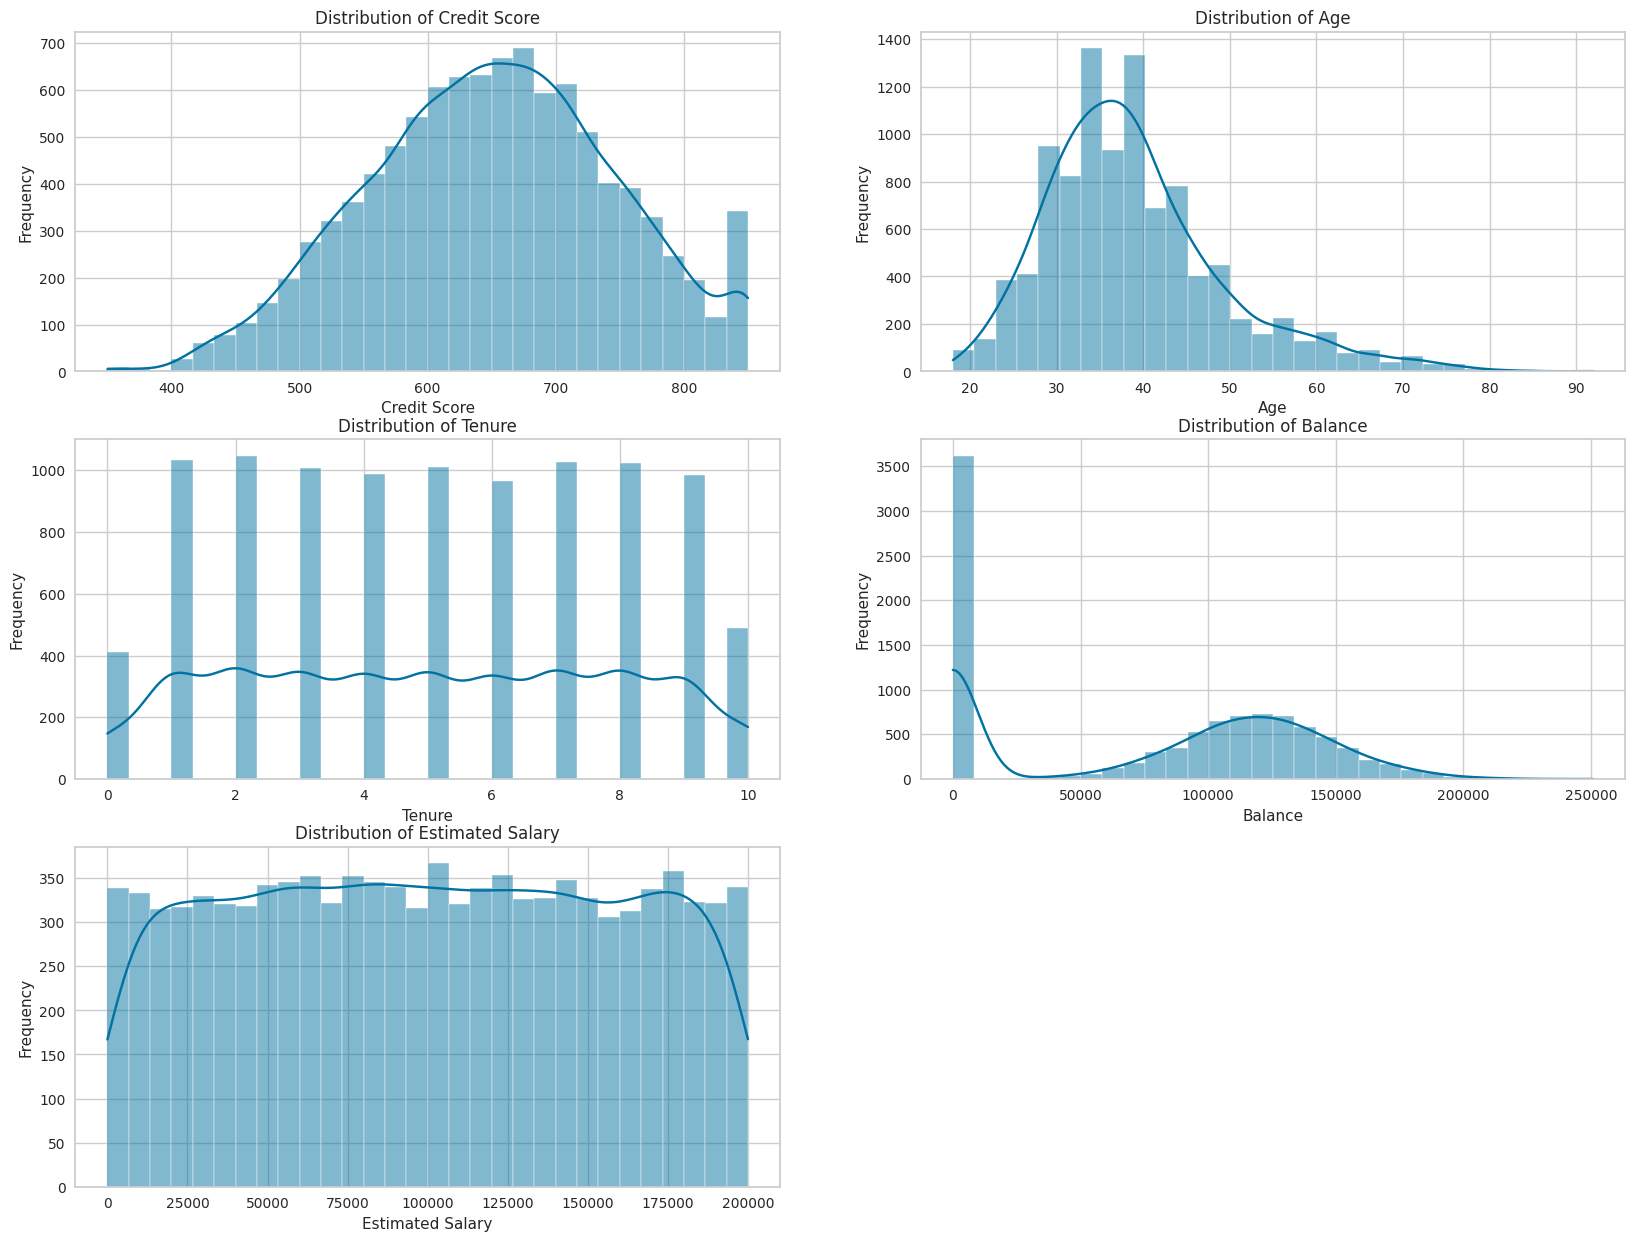

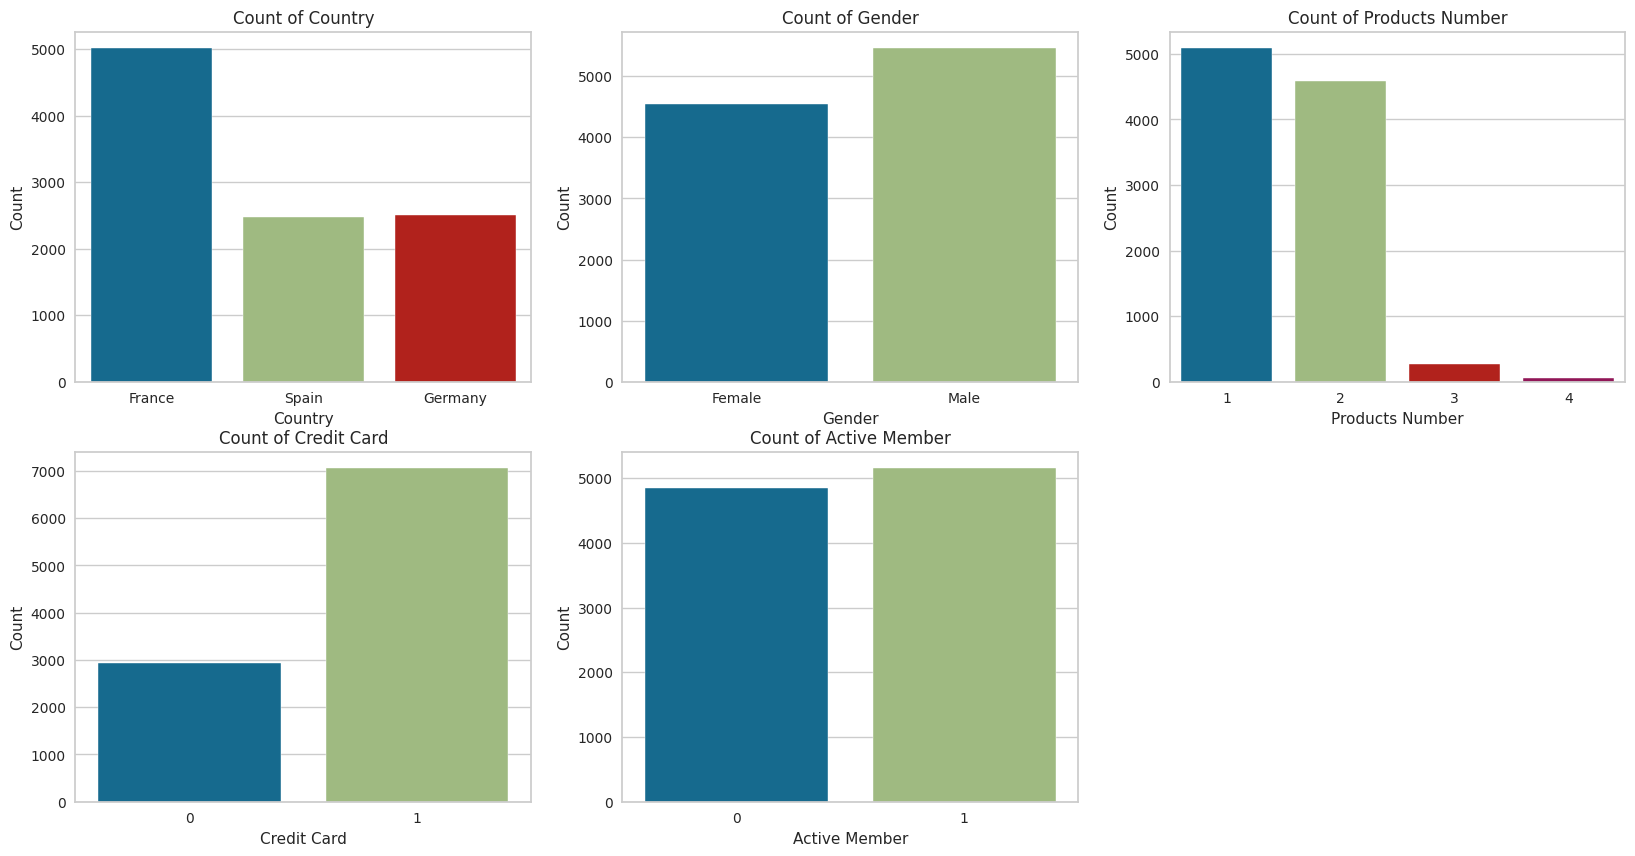

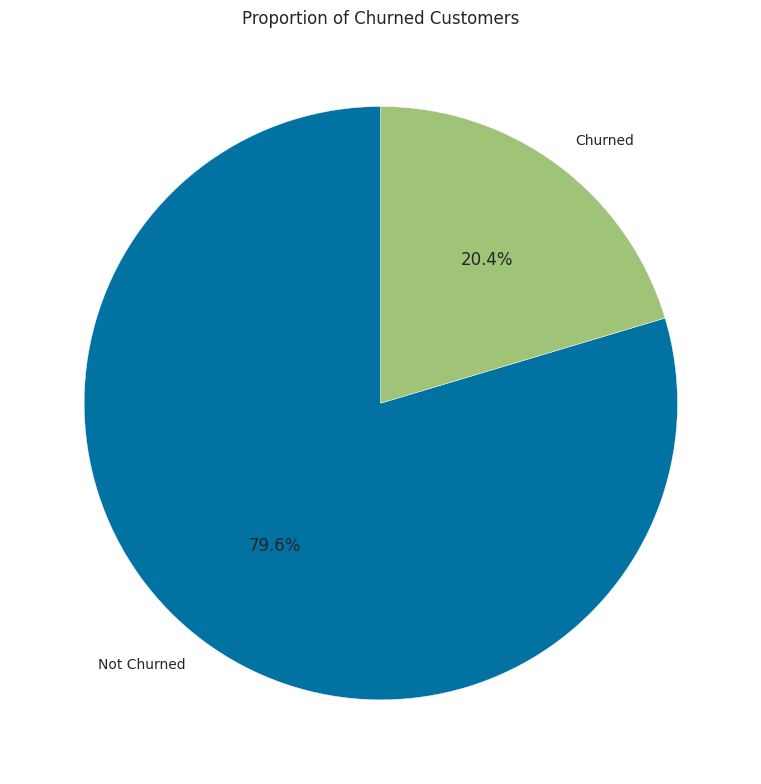

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Histograms for numerical features
for i, feature in enumerate(['credit_score', 'age', 'tenure', 'balance', 'estimated_salary'], start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

# Bar charts for categorical features
plt.figure(figsize=(20, 10))

for i, feature in enumerate(['country', 'gender', 'products_number', 'credit_card', 'active_member'], start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')

# Pie chart for churn
plt.figure(figsize=(8, 8))
churn_counts = df['churn'].value_counts()
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Churned Customers')

# Show plots
plt.tight_layout()
plt.show()


From the visualizations, we notice that:

**Numerical Features**
- `Credit Score` appears to be normally distributed with a slight left skew.
- `Age` shows a right skew, indicating a larger number of younger customers.
- `Tenure` roughly uniform distribution with dips at 0 and 10 years.
- `Balance` has a large peak at the zero balance, with the rest of the distribution being somewhat normal.
- `Estimated Salary` is uniformly distributed.

**Categorical Features**
- `Country` indicates that the majority of customers are from France, with Germany and Spain having a similar smaller amount.
- `Gender` shows that there are slightly more males than females.
- `Products Number` shows that most customers only use 1 or 2 products, with few using 3 or 4.
- `Credit Card` shows that a majority of customers have a credit card.
- `Active Member` shows that roughly half of customers are active members.
- `Churn` shows that 20.4% of customers have churned.

Now let's look at each feature's relationship to churn.

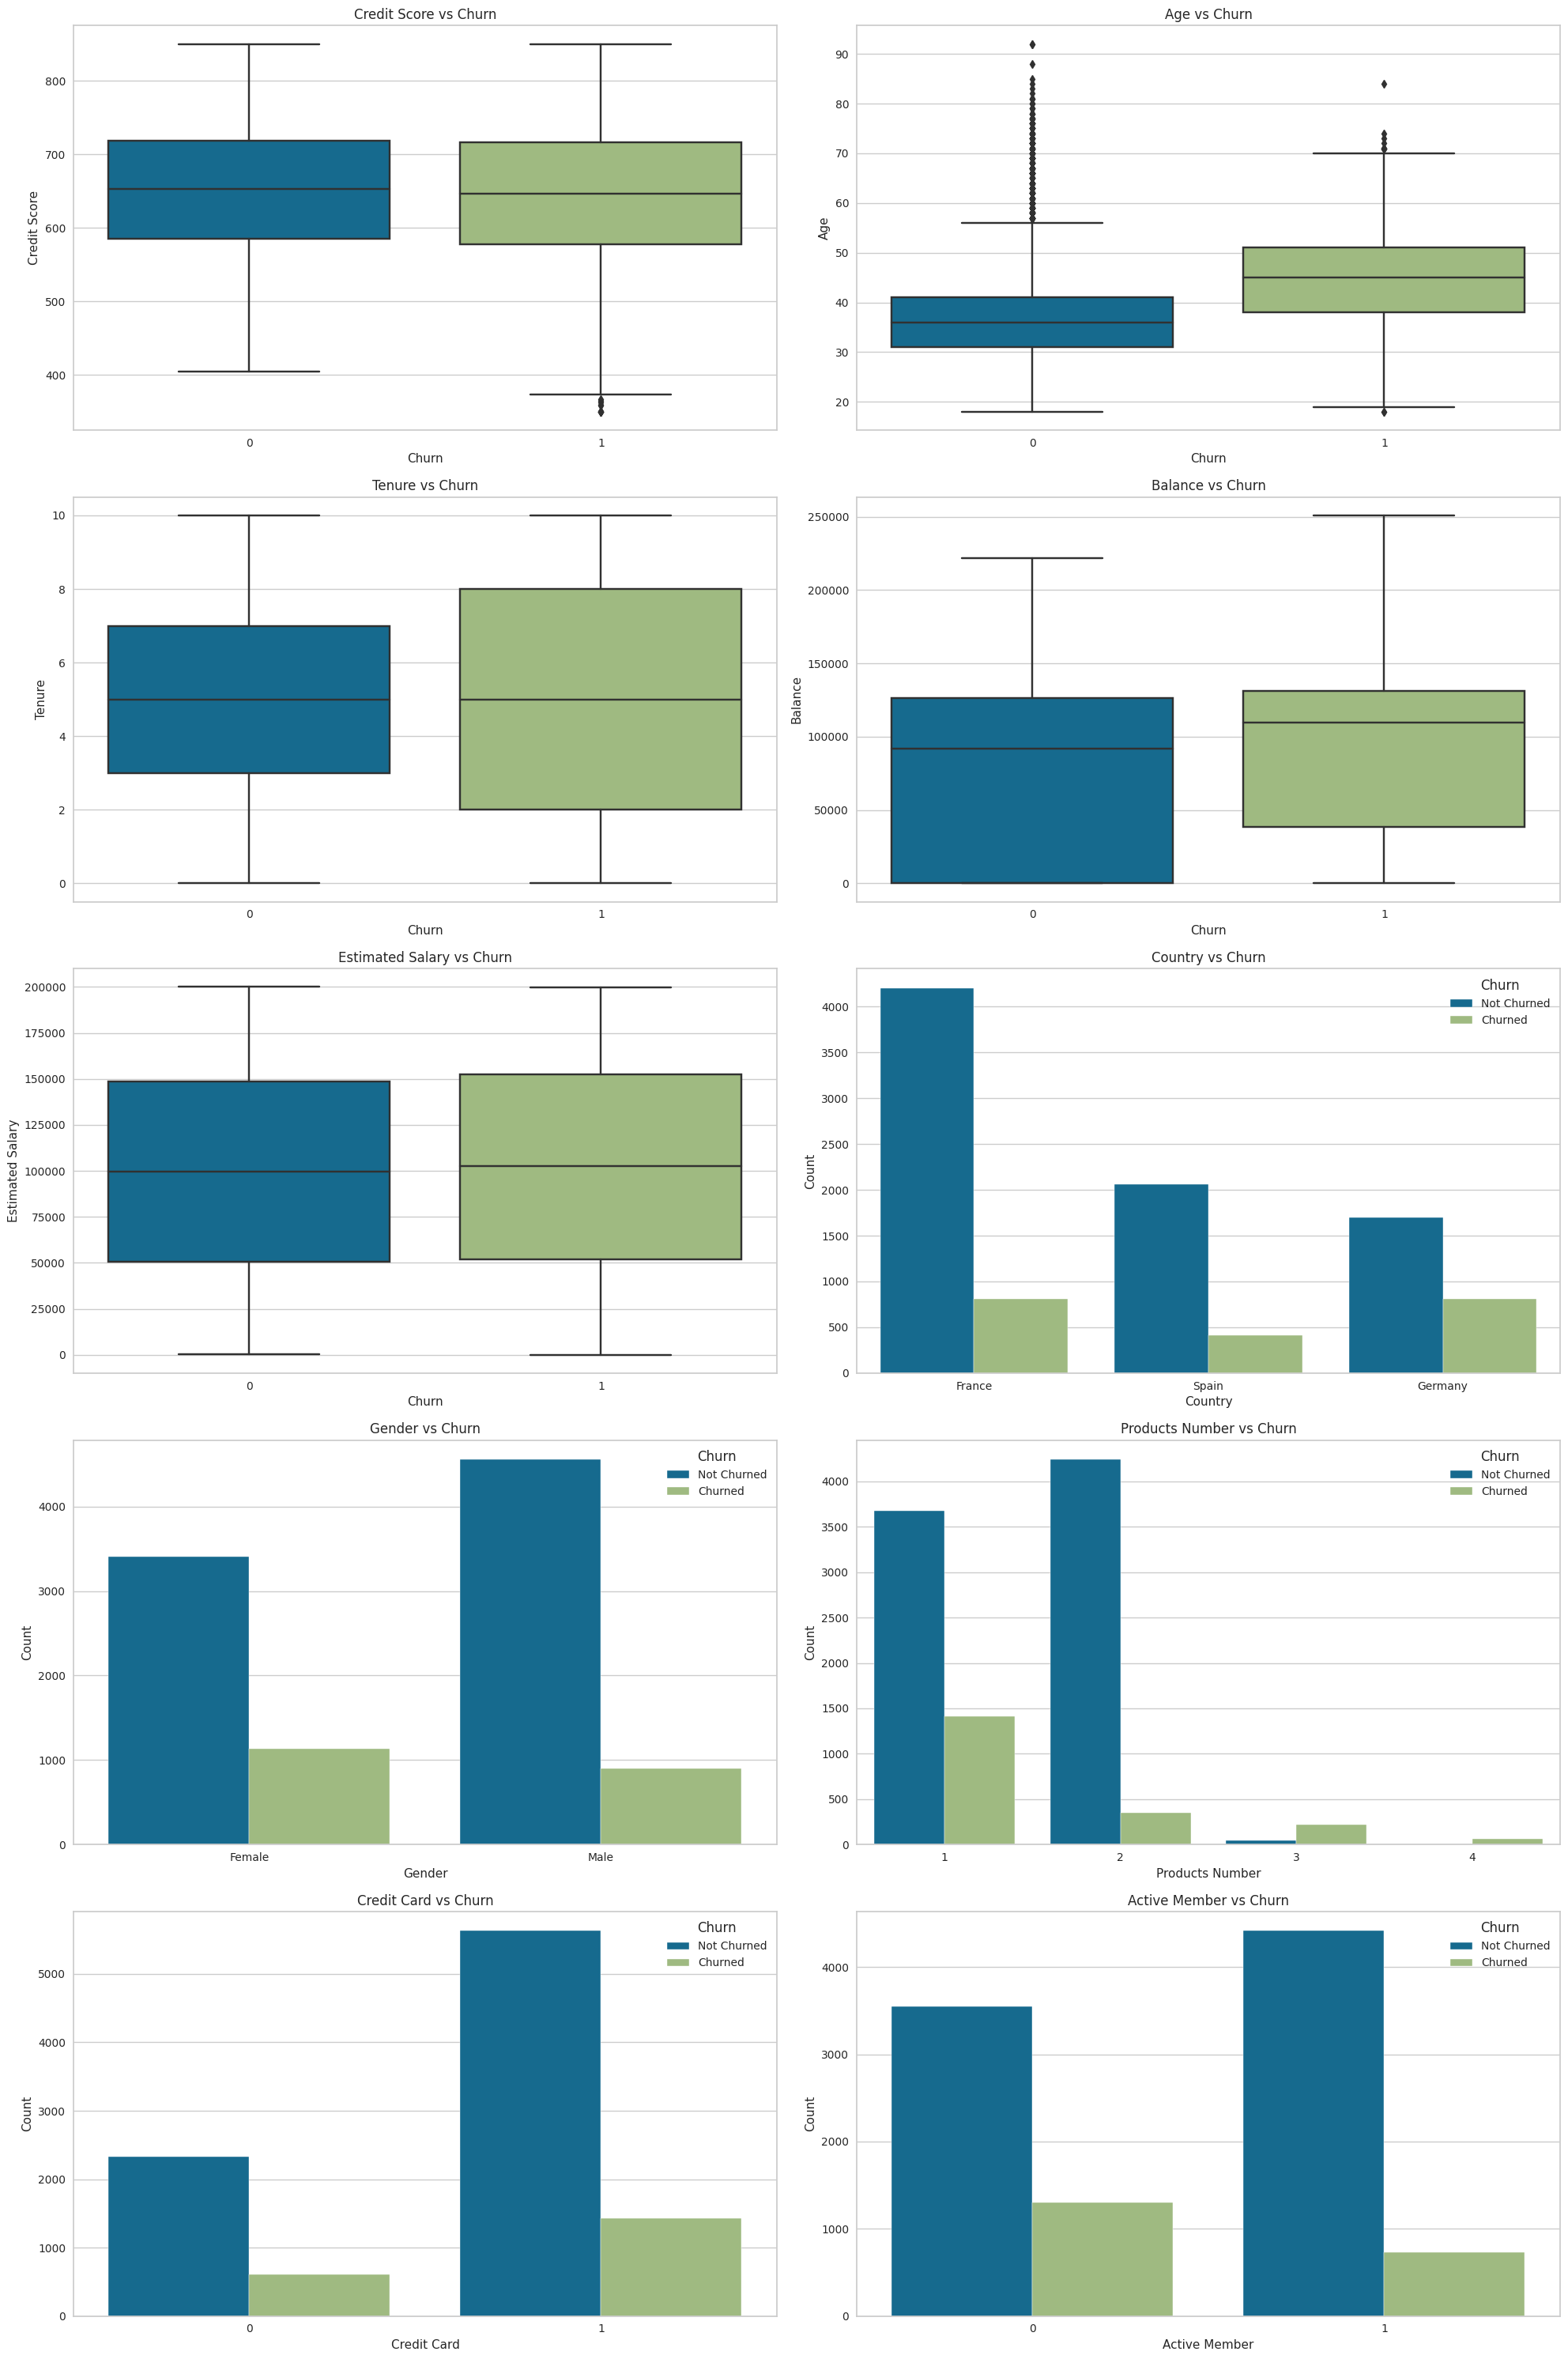

In [ ]:
# Initialize the figure
plt.figure(figsize=(20, 30))

# List of numerical and categorical features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
categorical_features = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

# Plot boxplots for numerical features
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature.replace("_", " ").title()} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature.replace("_", " ").title())

# Plot count plots for categorical features
for i, feature in enumerate(categorical_features, start=6):
    plt.subplot(5, 2, i)
    sns.countplot(x=feature, hue='churn', data=df)
    plt.title(f'{feature.replace("_", " ").title()} vs Churn')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

From these visualizations, we can see that:

**Numerical Features**
- `Credit Score` distribution appears similar for both churned and not churned customers. There are some outliers for the churned group exhibiting the lowest credit scores.  
- `Age` distributions are noticeably different. Churned customers tend to be older than ones who don't. The presense of more outliers on the 'Not Churned' side means that there are more customers with ages that fall outside the typical range within the group that has not churned.
- `Tenure` distributions are similar with the churned portion exhibiting a slightly larger variance.  
- `Balance` distributions are slightly different, with churned customers having a slightly larger median balance.  
- `Estimated Salary` distributions show no clear difference between those who churn and those who don't.

**Categorical Features**

- `Country` Churn varies by country.  France has the lowest churn rate, followed by Spain, then Germany.
- `Gender` Churn for females is slightly higher than males.
- `Products Number` There's a clear increase in churn as the number of products goes from 1 to 3.  While every customer with 4 products has churned, the sample is small relative to the dataset.
- `Credit Card` Owning  a credit card does not seem to make a significant difference in churn rates.
- `Active Member` Active Members have a lower churn rate than Inactive Members.  

## Machine Learning before Feature Engineering

### Classification

In [ ]:
from pycaret.classification import *
exp1 = setup(df, target='churn', session_id=1)

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 14)"
5,Transformed train set shape,"(7000, 14)"
6,Transformed test set shape,"(3000, 14)"
7,Ordinal features,1
8,Numeric features,9
9,Categorical features,2


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8657,0.8691,0.4810,0.7750,0.5928,0.5178,0.5393,0.8770
lightgbm,Light Gradient Boosting Machine,0.8614,0.8591,0.5098,0.7295,0.5993,0.5188,0.5314,0.5430
rf,Random Forest Classifier,0.8599,0.8556,0.4649,0.7531,0.5735,0.4955,0.5168,1.1100
ada,Ada Boost Classifier,0.8551,0.8515,0.4817,0.7143,0.5745,0.4914,0.5056,0.5920
et,Extra Trees Classifier,0.8533,0.8461,0.4466,0.7296,0.5528,0.4713,0.4922,1.1370
xgboost,Extreme Gradient Boosting,0.8509,0.8433,0.5000,0.6824,0.5768,0.4890,0.4979,0.2410
lda,Linear Discriminant Analysis,0.8069,0.7649,0.2307,0.5619,0.3264,0.2365,0.2686,0.2090
ridge,Ridge Classifier,0.8054,0.0000,0.1213,0.6205,0.2021,0.1449,0.2094,0.1020
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1800
dt,Decision Tree Classifier,0.7900,0.6839,0.5048,0.4858,0.4946,0.3622,0.3627,0.4760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

---

### Analysis of Results

We see that the best performing model is a Gradient Boosting Classifier.  Compared to a Dummy Classifier that always predicts no churn:

- `Accuracy` increased from 0.7963 to 0.8657 (8.7% increase).
- `AUC` increased from 0.5 to 0.8691 (73% increase).

What about the other metrics?

- `Recall` 0.4810, this means that our model correctly identifies 48.10% of of all actual churn cases.
- `Precision` 0.7750, this means that when a model predicts that a customer will churn, it's right 77.50% of the time.
- `F1-Score` 0.5928, this suggests that the model is more precise than it is sensitive.  
- `Kappa Statistic` 0.5178, this suggests that the model has a moderate level of prediction capability above random chance.  
- `MCC (Matthews Correlation Coefficient)` 0.5393, this suggests that the model is a relatively strong predictor.

Now let's look at some visualizations of our model's performance.

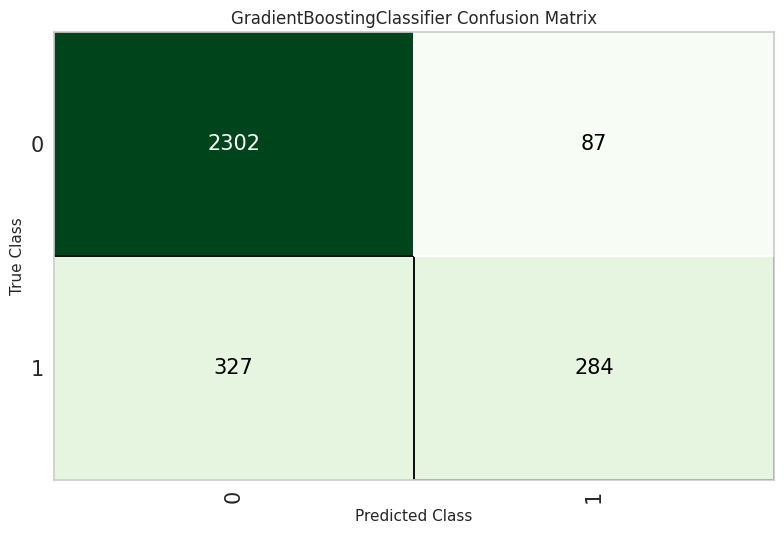

In [ ]:
plot_model(best, plot='confusion_matrix')

There are a few things we can learn from our confusion matrix:

- **True Positives (TP)**: The model correctly predicted 284 customers would churn.
- **True Negatives (TN)**: The model correctly predicted 2302 customers would not churn.
- **False Positives (FP)**: The model incorrectly predicted 87 customers would churn when they did not.
- **False Negatives (FN)**: The model failed to identify 327 customers who churned, predicting they would not.

What about the classification report?



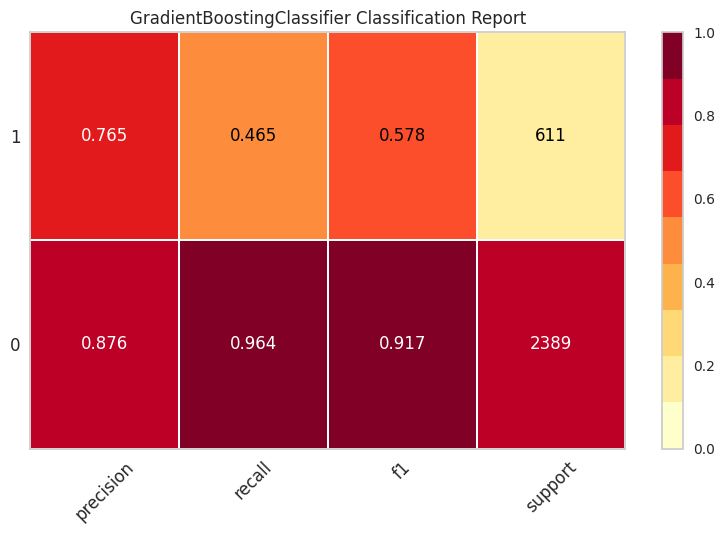

In [ ]:
plot_model(best, plot='class_report')

The classification report shows that the model is weaker at predicting churn than it is at predicting no churn.

What about the lift and gain charts?

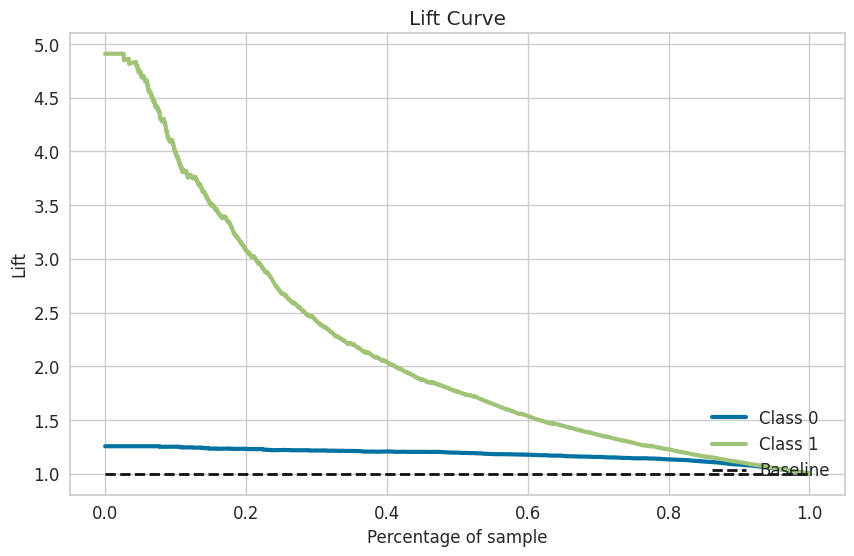

In [ ]:
plot_model(best, plot='lift')

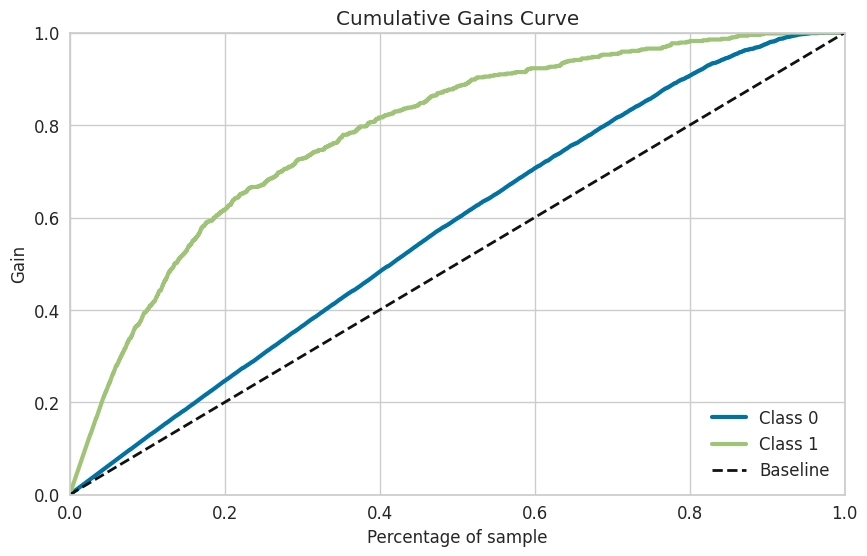

In [ ]:
plot_model(best, plot='gain')

The lift chart shows high values at the start, meaning the model is very effective at identifying the most likely positive cases.  It also indicates that the model provides better predictions than random guessing.  

The gain chart shows that a significant percentage of the positive cases (60%) are captured using a small percentage of the sample (20%).  

Both charts show diminishing returns as the sample size increases.  Both charts also show that the model seems to be better at predicting churn over no churn.  

Our metrics seem to disagree--how can this be the case?

So while the model is good at identifying potential positive cases, it tends to miss a substantial portion of actual positives, which is why we're seeing a low recall value for class 1. This might be acceptable or even preferable given that the cost of having a false positive is much less than the cost of having a false negative.

Let's see what the decision boundary looks like.

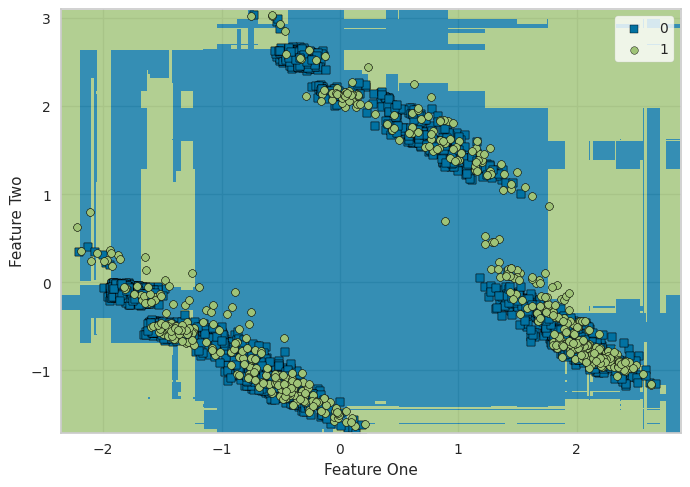

In [ ]:
plot_model(best, plot='boundary')

We see that the decision boundary is quite complex.
 There's a mix of points in the two regions, indicating that the model has some degree of misclassification.  

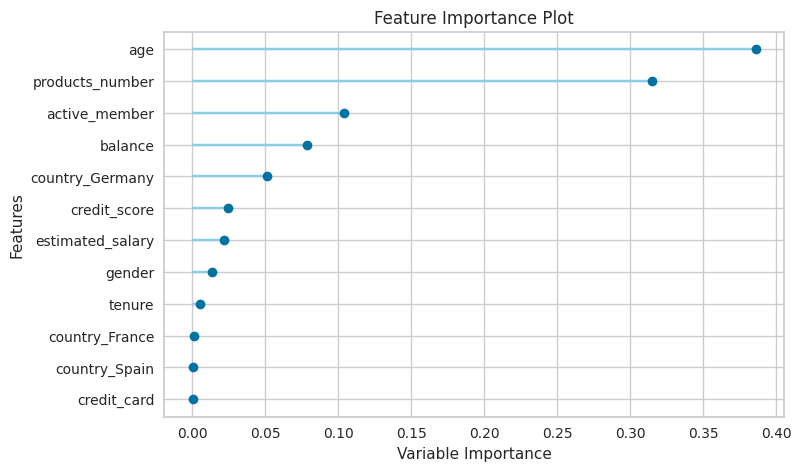

In [ ]:
plot_model(best, plot='feature_all')

Here we see the most important features to this model.  The age of the customer and the number of products they own are the most important features to this model, while being from France or Spain and owning a credit card are the least important.

## Clustering

To make our dataset work with clustering, we need to encode the `country` and `gender` columns, and we need to scale the numerical features.

In [ ]:
# Encoding the categorical variables using get_dummies (One Hot Encoding)
data_encoded = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# Normalizing the numerical features to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Display the data after preprocessing and the missing values
preprocessed_data = data_encoded
preprocessed_data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


IndexError: ignored

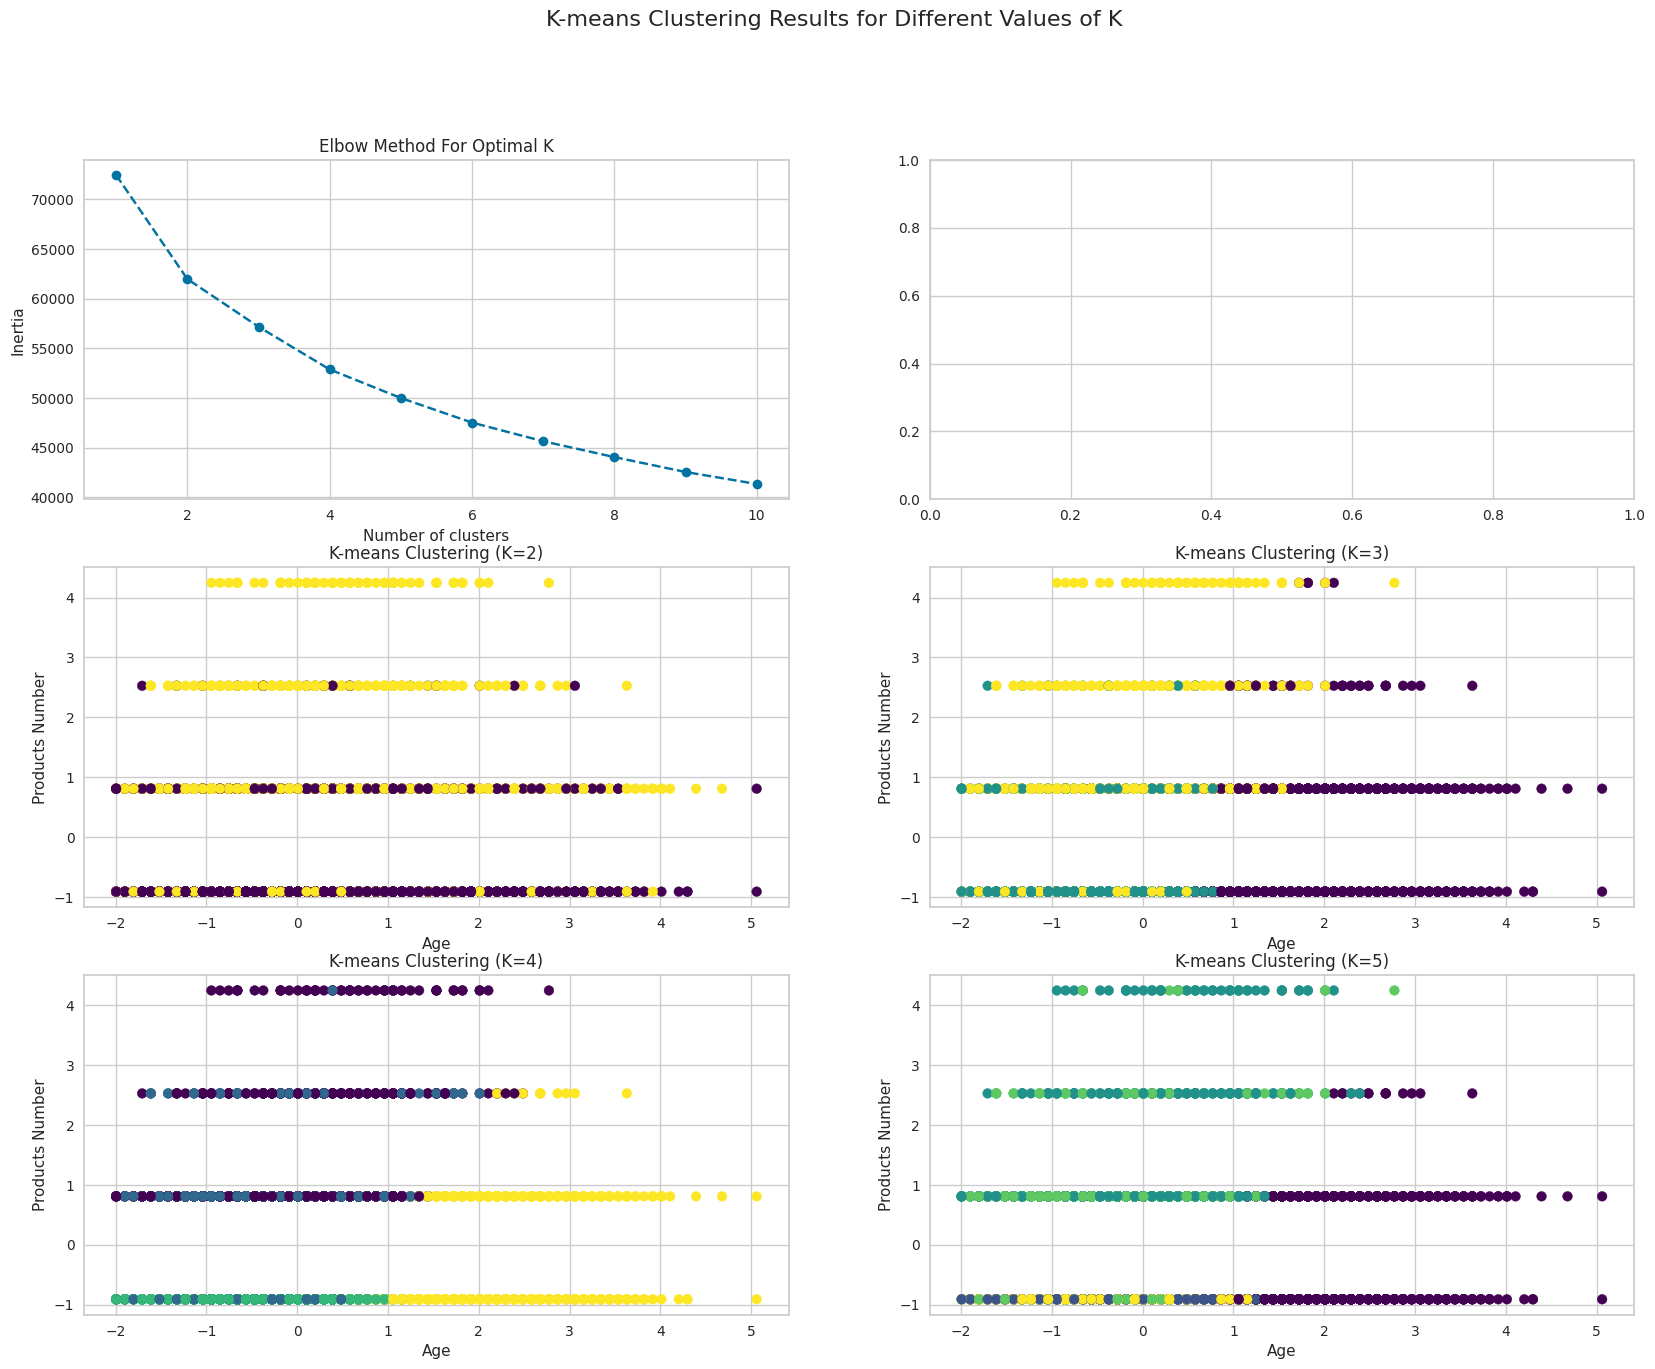

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(preprocessed_data)
    inertia.append(kmeans.inertia_)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('K-means Clustering Results for Different Values of K', fontsize=16)

# Plotting the elbow method
axs[0, 0].plot(range(1, 11), inertia, marker='o', linestyle='--')
axs[0, 0].set_title('Elbow Method For Optimal K')
axs[0, 0].set_xlabel('Number of clusters')
axs[0, 0].set_ylabel('Inertia')

# Plot clustering results for different K values
k_values = [2, 3, 4, 5, 6]
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(preprocessed_data)
    cluster_labels = kmeans.predict(preprocessed_data)

    # Scatter plot of clustering results
    feature_1 = preprocessed_data['age']
    feature_2 = preprocessed_data['products_number']

    axs[i//2 + 1, i%2].scatter(feature_1, feature_2, c=cluster_labels, cmap='viridis')
    axs[i//2 + 1, i%2].set_title(f'K-means Clustering (K={k})')
    axs[i//2 + 1, i%2].set_xlabel('Age')
    axs[i//2 + 1, i%2].set_ylabel('Products Number')

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

The Elbow Method graph suggests using between 2 and 4 clusters.

## Feature Engineering

### 1) Adding Clusters as Features

Let's see if adding `cluster` as a categorical column will make the model perform better.

In [ ]:
# Define the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# copy the data into a new dataframe
df_fe = preprocessed_data

# Fit the model to the data and predict the cluster assignments.
df_fe['cluster'] = kmeans.fit_predict(df_fe[['age', 'products_number']])

df_fe

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male,cluster
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,0,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0,1
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,0,0,1,1
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0,0,0,1,0
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0,0,0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,1,0,1,1


In [ ]:
exp2 = setup(df_fe, target='churn', session_id=1)

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 13)"
4,Transformed data shape,"(10000, 13)"
5,Transformed train set shape,"(7000, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8656,0.8694,0.4831,0.7721,0.5936,0.5183,0.5391,1.3750
lightgbm,Light Gradient Boosting Machine,0.8637,0.8606,0.5175,0.7357,0.6070,0.5276,0.5400,1.3550
rf,Random Forest Classifier,0.8611,0.8544,0.4796,0.7483,0.5833,0.5050,0.5236,0.8330
ada,Ada Boost Classifier,0.8551,0.8516,0.4810,0.7149,0.5741,0.4910,0.5055,0.2980
xgboost,Extreme Gradient Boosting,0.8533,0.8484,0.5112,0.6889,0.5862,0.4995,0.5081,0.1660
et,Extra Trees Classifier,0.8524,0.8480,0.4502,0.7210,0.5530,0.4705,0.4898,0.5600
knn,K Neighbors Classifier,0.8427,0.8081,0.4537,0.6678,0.5401,0.4495,0.4618,0.2310
lr,Logistic Regression,0.8411,0.8370,0.3794,0.7047,0.4924,0.4084,0.4362,0.0730
lda,Linear Discriminant Analysis,0.8384,0.8378,0.3632,0.6986,0.4773,0.3931,0.4228,0.0410
svm,SVM - Linear Kernel,0.8380,0.0000,0.3148,0.7526,0.4334,0.3596,0.4098,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Adding `cluster` as a feature barely decreased overall performance while barely increasing recall for the `gbc`.  The highest recall achieved by a model went down considerably from 0.8213 (`qda`) to 0.5175 (`lgbm`) while gaining some precision, 0.7750 (`gbc`) to 0.8305 (`qda`).  The performance increase could be due to data leakage though, so would should be skeptical of these results.

### 2) Grouping Products Number 3 and 4 Together

What if we group `products_number` 3 and 4 into a single group?

In [ ]:
df = reset(file_path)

In [ ]:
# copy the data into a new dataframe
df_fe = df

# Group values 3 and 4 together and encode as a single category, let's call it '3_or_4'
df_fe['products_number'] = df_fe['products_number'].replace({3: '3_or_4', 4: '3_or_4'})

# Perform one-hot encoding (dummy encoding) on the 'products_number' column
df_fe = pd.get_dummies(df_fe, columns=['products_number'], prefix='products')

df_fe.head()

,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,products_1,products_2,products_3_or_4
0,619,France,Female,42,2,0.00,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,0,1,0,0
2,502,France,Female,42,8,159660.80,1,0,113931.57,1,0,0,1
3,699,France,Female,39,1,0.00,0,0,93826.63,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,1,0,0


In [ ]:
exp3 = setup(df_fe, target='churn', session_id = 1)

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 13)"
4,Transformed data shape,"(10000, 15)"
5,Transformed train set shape,"(7000, 15)"
6,Transformed test set shape,"(3000, 15)"
7,Ordinal features,1
8,Numeric features,10
9,Categorical features,2


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8656,0.8687,0.4909,0.7656,0.5977,0.5216,0.5405,1.0800
rf,Random Forest Classifier,0.8583,0.8499,0.4747,0.7365,0.5766,0.4964,0.5140,1.1950
lightgbm,Light Gradient Boosting Machine,0.8579,0.8596,0.5049,0.7136,0.5909,0.5080,0.5194,0.5270
ada,Ada Boost Classifier,0.8556,0.8517,0.4838,0.7148,0.5763,0.4933,0.5073,0.4330
et,Extra Trees Classifier,0.8521,0.8430,0.4410,0.7258,0.5473,0.4655,0.4867,0.9310
xgboost,Extreme Gradient Boosting,0.8487,0.8438,0.5063,0.6714,0.5767,0.4868,0.4944,0.2400
lda,Linear Discriminant Analysis,0.8383,0.8378,0.3632,0.6979,0.4771,0.3927,0.4223,0.2020
ridge,Ridge Classifier,0.8349,0.0000,0.2756,0.7621,0.4040,0.3320,0.3905,0.1180
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1720
dt,Decision Tree Classifier,0.7921,0.6863,0.5077,0.4922,0.4989,0.3680,0.3687,0.1270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Grouping `products_number` 3 and 4 together decreased overall performance slightly while increasing recall.

### 3) Binning Ages

What if we bin the ages?

In [ ]:
df = reset(file_path)

In [ ]:
# copy the data to a new dataframe
df_fe = df

# Define custom age bins
custom_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]  # Customize the age intervals as needed
bin_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Use pd.cut to bin the 'age' column
df_fe['age_bins'] = pd.cut(df_fe['age'], bins=custom_bins, labels=bin_labels, right=False)

df_fe.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49


In [ ]:
exp4 = setup(df_fe, target='churn', session_id = 1)

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 21)"
5,Transformed train set shape,"(7000, 21)"
6,Transformed test set shape,"(3000, 21)"
7,Ordinal features,1
8,Numeric features,8
9,Categorical features,3


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8659,0.8684,0.4859,0.7711,0.5956,0.5202,0.5404,1.9150
lightgbm,Light Gradient Boosting Machine,0.8624,0.8592,0.5091,0.7333,0.6003,0.5207,0.5336,1.0830
rf,Random Forest Classifier,0.8576,0.8452,0.4585,0.7437,0.5659,0.4868,0.5078,1.1450
ada,Ada Boost Classifier,0.8566,0.8524,0.4775,0.7243,0.5749,0.4932,0.5089,0.7760
et,Extra Trees Classifier,0.8521,0.8368,0.4677,0.7066,0.5617,0.4775,0.4927,0.8120
xgboost,Extreme Gradient Boosting,0.8501,0.8417,0.4979,0.6819,0.5752,0.4869,0.4960,0.4870
ridge,Ridge Classifier,0.8224,0.0000,0.2454,0.6812,0.3603,0.2826,0.3329,0.2090
lda,Linear Discriminant Analysis,0.8173,0.7870,0.3275,0.5953,0.4219,0.3241,0.3449,0.3020
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1260
lr,Logistic Regression,0.7891,0.6701,0.0554,0.3764,0.0962,0.0471,0.0755,0.1610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Binning the ages improved recall slightly.  Let's try transforming `age` and `balance` with box-cox.

### 4) Box-Cox Transform of Age and Balance

In [ ]:
df = reset(file_path)

In [ ]:
from scipy import stats

# copy the data to a new dataframe
df_fe2 = df

# Apply Box-Cox transformation to 'age' column
df_fe2['age_boxcox'], _ = stats.boxcox(df_fe2['age'])

# Apply Box-Cox transformation to 'balance' column (note: Box-Cox requires positive values)
df_fe2['balance_boxcox'], _ = stats.boxcox(df_fe2['balance'] + 1)  # Add 1 to avoid zero values

df_fe2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_boxcox,balance_boxcox
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2.530867,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2.520415,28.900279
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2.530867,32.417997
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2.498541,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2.541019,31.065765


In [ ]:
exp5 = setup(df_fe2, target='churn', session_id = 1)

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 13)"
4,Transformed data shape,"(10000, 15)"
5,Transformed train set shape,"(7000, 15)"
6,Transformed test set shape,"(3000, 15)"
7,Ordinal features,1
8,Numeric features,10
9,Categorical features,2


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8657,0.8688,0.4810,0.7750,0.5928,0.5178,0.5393,1.6670
rf,Random Forest Classifier,0.8617,0.8510,0.4691,0.7598,0.5789,0.5020,0.5234,1.3870
lightgbm,Light Gradient Boosting Machine,0.8614,0.8591,0.5098,0.7295,0.5993,0.5188,0.5314,1.0570
et,Extra Trees Classifier,0.8567,0.8473,0.4782,0.7263,0.5758,0.4941,0.5102,0.6960
ada,Ada Boost Classifier,0.8551,0.8515,0.4817,0.7143,0.5745,0.4914,0.5056,0.4150
xgboost,Extreme Gradient Boosting,0.8509,0.8433,0.5000,0.6824,0.5768,0.4890,0.4979,0.4690
lda,Linear Discriminant Analysis,0.8134,0.7691,0.2307,0.6110,0.3340,0.2509,0.2916,0.1270
ridge,Ridge Classifier,0.8087,0.0000,0.1178,0.6874,0.2003,0.1490,0.2266,0.1850
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0980
nb,Naive Bayes,0.7923,0.7216,0.1354,0.4728,0.2097,0.1302,0.1649,0.1100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Doing a box-cox transform on `age` and `balance` also improved recall slightly.

### 5) Leaving out Tenure and Estimated Salary

What if we simply leave out the uniformly distributed features like `tenure` and `estimated_salary`?

In [ ]:
df = reset(file_path)

In [ ]:
exp6 = setup(df, target='churn', session_id = 1, ignore_features=['tenure','estimated_salary'])

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(10000, 11)"
5,Transformed train set shape,"(7000, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,6


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8653,0.8690,0.4845,0.7689,0.5941,0.5183,0.5384,0.6350
ada,Ada Boost Classifier,0.8573,0.8539,0.4852,0.7228,0.5800,0.4982,0.5128,0.4640
lightgbm,Light Gradient Boosting Machine,0.8570,0.8597,0.4992,0.7129,0.5867,0.5036,0.5155,0.7220
rf,Random Forest Classifier,0.8547,0.8403,0.4894,0.7071,0.5772,0.4933,0.5060,1.1180
xgboost,Extreme Gradient Boosting,0.8483,0.8419,0.4943,0.6749,0.5698,0.4805,0.4895,0.3050
et,Extra Trees Classifier,0.8459,0.8276,0.4873,0.6677,0.5620,0.4715,0.4808,1.1210
lda,Linear Discriminant Analysis,0.8081,0.7653,0.2342,0.5694,0.3312,0.2418,0.2745,0.1220
ridge,Ridge Classifier,0.8056,0.0000,0.1227,0.6209,0.2040,0.1464,0.2107,0.1190
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1090
dt,Decision Tree Classifier,0.7947,0.6876,0.5070,0.4970,0.5015,0.3724,0.3727,0.2380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

We see that leaving out `tenure` and `estimated_salary` also improved recall slightly.

### 6) PCA

In [ ]:
df = reset(file_path)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df_fe3 = df

In [ ]:
# Define the numerical and categorical column names
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_cols = ['country', 'gender', 'credit_card', 'active_member', 'churn']


In [ ]:
# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ],
    remainder='passthrough'
)

# Fit and transform the data
X = preprocessor.fit_transform(df_fe3)


In [ ]:
# Create a PCA instance and specify the number of components you want
n_components = 4  # You can choose the number of components based on your needs
pca = PCA(n_components=n_components)

# Fit and transform the data
principal_components = pca.fit_transform(X)


In [ ]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])  # Adjust column names as needed

# Add the target column to the new DataFrame
pca_df['churn'] = df['churn']

pca_df

,PC1,PC2,PC3,PC4,churn
0,0.127391,0.938621,-0.290759,0.463816,1
1,-0.757358,0.514096,-0.403845,0.552626,0
2,0.646148,0.382619,1.632064,0.876062,1
3,1.411269,0.606381,-0.937911,-0.161716,0
4,-1.192386,0.338845,-1.562410,-1.677868,0
...,...,...,...,...,...
9995,1.507185,0.023680,-0.516185,-1.062915,0
9996,-0.130755,-0.824063,1.222751,1.122594,0
9997,0.326294,0.063778,-0.675661,-0.282656,1
9998,0.200103,0.579754,-0.691049,-1.122943,1


In [ ]:
exp6 = setup(pca_df, target='churn', session_id = 1)

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 5)"
4,Transformed data shape,"(10000, 5)"
5,Transformed train set shape,"(7000, 5)"
6,Transformed test set shape,"(3000, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8476,0.8567,0.4958,0.6719,0.5695,0.4796,0.4884,1.0930
et,Extra Trees Classifier,0.8434,0.8493,0.4579,0.6706,0.5433,0.4530,0.4655,0.5640
gbc,Gradient Boosting Classifier,0.8430,0.8546,0.4705,0.6636,0.5499,0.4581,0.4685,1.5410
rf,Random Forest Classifier,0.8427,0.8509,0.4769,0.6581,0.5521,0.4598,0.4691,1.7210
xgboost,Extreme Gradient Boosting,0.8400,0.8456,0.4853,0.6432,0.5524,0.4574,0.4646,0.1440
ada,Ada Boost Classifier,0.8286,0.8319,0.4060,0.6226,0.4910,0.3934,0.4067,0.3140
knn,K Neighbors Classifier,0.8223,0.7805,0.4187,0.5917,0.4896,0.3859,0.3948,0.0650
qda,Quadratic Discriminant Analysis,0.7984,0.8107,0.2448,0.5128,0.3308,0.2293,0.2514,0.0340
lda,Linear Discriminant Analysis,0.7963,0.8061,0.2378,0.5004,0.3218,0.2196,0.2409,0.0350
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

- Using PCA with 2 components didn't improve performance.  
- Using PCA with 3 components increased recall but slightly reduced performance overall.
- Using PCA with 4 components increased recall less than 3 components, and reduced overall performance slightly.

### 7) Class Imbalance

What if we used SMOTE to oversample the minority class (churn)?

In [ ]:
df = reset(file_path)

In [ ]:
exp7 = setup(df, target='churn', session_id = 1, fix_imbalance=True)

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(14148, 13)"
5,Transformed train set shape,"(11148, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Ordinal features,1
8,Numeric features,8
9,Categorical features,2


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8586,0.8612,0.5322,0.7013,0.6046,0.5206,0.5282,1.7210
gbc,Gradient Boosting Classifier,0.8576,0.8669,0.5371,0.6951,0.6050,0.5201,0.5270,3.5750
rf,Random Forest Classifier,0.8557,0.8493,0.5020,0.7053,0.5851,0.5010,0.5124,1.9100
xgboost,Extreme Gradient Boosting,0.8549,0.8476,0.5273,0.6888,0.5962,0.5098,0.5172,0.4230
et,Extra Trees Classifier,0.8524,0.8451,0.4895,0.6965,0.5738,0.4880,0.4997,1.2850
ada,Ada Boost Classifier,0.8471,0.8487,0.5427,0.6495,0.5904,0.4976,0.5011,0.7720
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1220
dt,Decision Tree Classifier,0.7939,0.7004,0.5427,0.4952,0.5173,0.3868,0.3878,0.1790
ridge,Ridge Classifier,0.7121,0.0000,0.6767,0.3834,0.4893,0.3098,0.3341,0.1290
lda,Linear Discriminant Analysis,0.7120,0.7658,0.6767,0.3833,0.4892,0.3096,0.3339,0.2730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Using SMOTE gave a small improvement to recall at the cost of slight reductions in performance overall.

## Machine Learning After Feature Engineering

Now that we've seen what feature engineering steps lead to increased performance, let's try using them together and see if we can make the model significantly better.  This is a list of all the transformations we will make:

Model 1)
- Adding a new column `balance_to_salary_ratio`
- SMOTE
- Ignore `tenure` as a feature and drop `balance` and `estimated_salary` features
- PCA

Model 2)
- Adding a new column `balance to salary ratio`
- SMOTE
- Ignore `tenure` as a feature and drop `balance` feature

Model 3)
- SMOTE
- Ignore `tenure` and `estimated_salary` features
- PCA

Model 4)
- SMOTE
- Ignore `tenure` and `estimated_salary` features

### Model 1

In [ ]:
df = reset(file_path)

In [ ]:
# Add a new column 'balance_to_salary_ratio'
df['balance_to_salary_ratio'] = df['balance'] / df['estimated_salary']
df.drop(columns=['balance', 'estimated_salary'], inplace=True)

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,products_number,credit_card,active_member,churn,balance_to_salary_ratio
0,619,France,Female,42,2,1,1,1,1,0.000000
1,608,Spain,Female,41,1,1,0,1,0,0.744677
2,502,France,Female,42,8,3,1,0,1,1.401375
3,699,France,Female,39,1,2,0,0,0,0.000000
4,850,Spain,Female,43,2,1,1,1,0,1.587055


In [ ]:
exp20 = setup(df, fix_imbalance=True, pca=True, session_id=1, target='churn', ignore_features=['tenure'])

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 10)"
4,Transformed data shape,"(14148, 11)"
5,Transformed train set shape,"(11148, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,6


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8446,0.8422,0.5315,0.6434,0.5816,0.4873,0.4910,1.5240
gbc,Gradient Boosting Classifier,0.8397,0.8453,0.6066,0.6065,0.6061,0.5055,0.5058,3.9960
xgboost,Extreme Gradient Boosting,0.8336,0.8164,0.5069,0.6094,0.5528,0.4518,0.4550,0.4170
rf,Random Forest Classifier,0.8329,0.8143,0.5203,0.6031,0.5581,0.4559,0.4580,3.2440
ada,Ada Boost Classifier,0.8251,0.8346,0.6262,0.5643,0.5930,0.4821,0.4837,1.0890
et,Extra Trees Classifier,0.8199,0.7988,0.4936,0.5659,0.5265,0.4161,0.4180,1.5500
nb,Naive Bayes,0.8069,0.7973,0.1065,0.6699,0.1741,0.1298,0.2033,0.1430
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1670
dt,Decision Tree Classifier,0.7811,0.6810,0.5125,0.4673,0.4883,0.3497,0.3506,0.3350
qda,Quadratic Discriminant Analysis,0.7570,0.7468,0.2641,0.6780,0.2893,0.1996,0.2661,0.1540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#### Plots

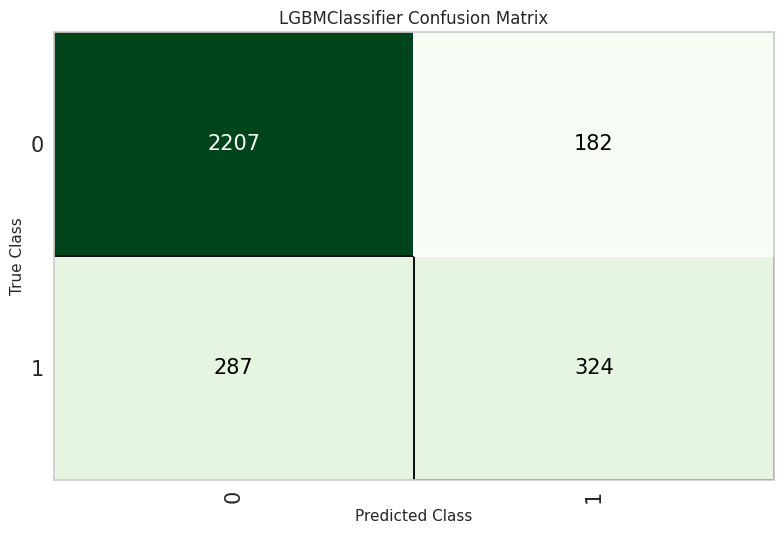

In [ ]:
plot_model(best, plot='confusion_matrix')

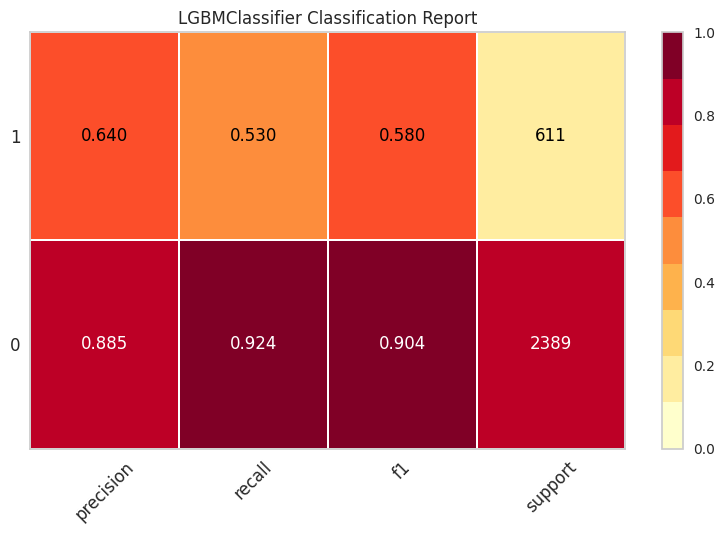

In [ ]:
plot_model(best, plot='class_report')

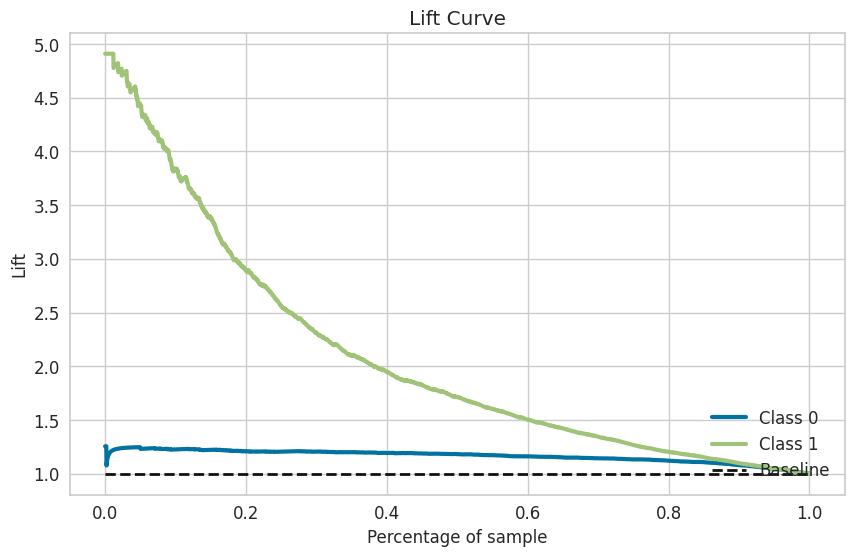

In [ ]:
plot_model(best, plot='lift')

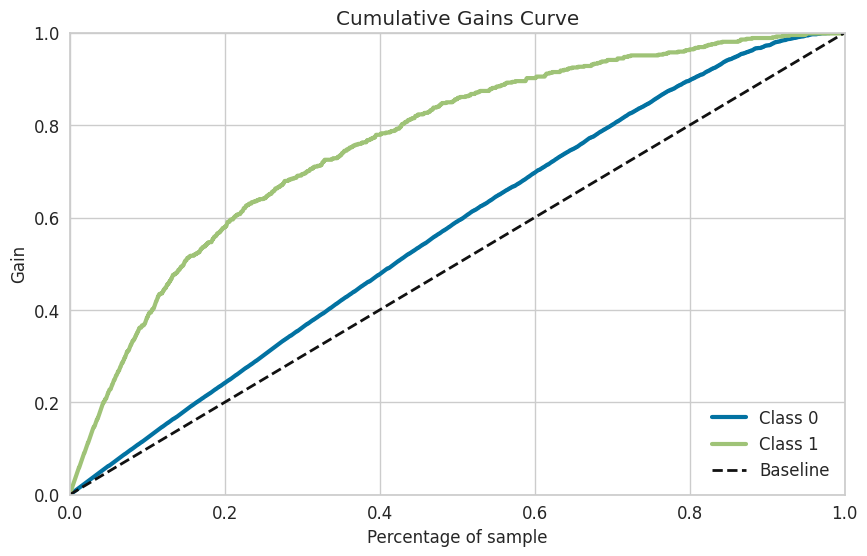

In [ ]:
plot_model(best, plot='gain')

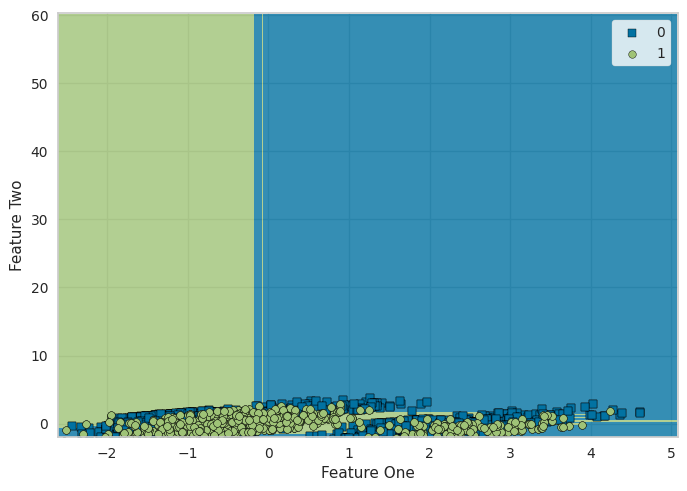

In [ ]:
plot_model(best, plot='boundary')

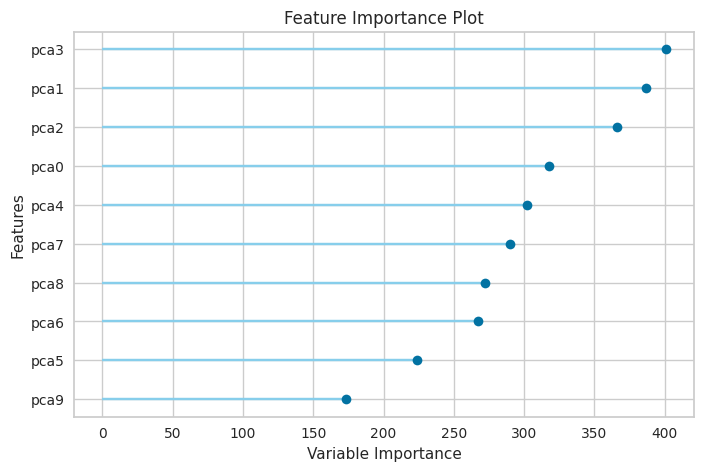

In [ ]:
plot_model(best, plot='feature_all')

---

### Model 2

In [ ]:
df = reset(file_path)

In [ ]:
# Add a new column 'balance_to_salary_ratio'
df['balance_to_salary_ratio'] = df['balance'] / df['estimated_salary']
df.drop(columns=['balance', 'estimated_salary'], inplace=True)

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,products_number,credit_card,active_member,churn,balance_to_salary_ratio
0,619,France,Female,42,2,1,1,1,1,0.000000
1,608,Spain,Female,41,1,1,0,1,0,0.744677
2,502,France,Female,42,8,3,1,0,1,1.401375
3,699,France,Female,39,1,2,0,0,0,0.000000
4,850,Spain,Female,43,2,1,1,1,0,1.587055


In [ ]:
exp21 = setup(df, target='churn', session_id=1, fix_imbalance=True, ignore_features=['tenure'])

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 10)"
4,Transformed data shape,"(14148, 11)"
5,Transformed train set shape,"(11148, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,6


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8564,0.8557,0.5126,0.7013,0.5918,0.5074,0.5168,1.5910
gbc,Gradient Boosting Classifier,0.8563,0.8632,0.5203,0.6973,0.5953,0.5103,0.5187,1.6730
rf,Random Forest Classifier,0.8504,0.8299,0.5013,0.6800,0.5763,0.4882,0.4970,2.2650
ada,Ada Boost Classifier,0.8480,0.8490,0.5427,0.6535,0.5920,0.4998,0.5035,1.0060
xgboost,Extreme Gradient Boosting,0.8456,0.8347,0.5076,0.6561,0.5722,0.4799,0.4859,0.4070
et,Extra Trees Classifier,0.8359,0.8155,0.4796,0.6272,0.5426,0.4450,0.4514,1.0910
nb,Naive Bayes,0.8147,0.7847,0.1858,0.6998,0.2822,0.2168,0.2856,0.1500
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1510
dt,Decision Tree Classifier,0.7867,0.6870,0.5189,0.4784,0.4975,0.3625,0.3632,0.1640
ridge,Ridge Classifier,0.7116,0.0000,0.6746,0.3824,0.4880,0.3081,0.3322,0.2770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#### Plots

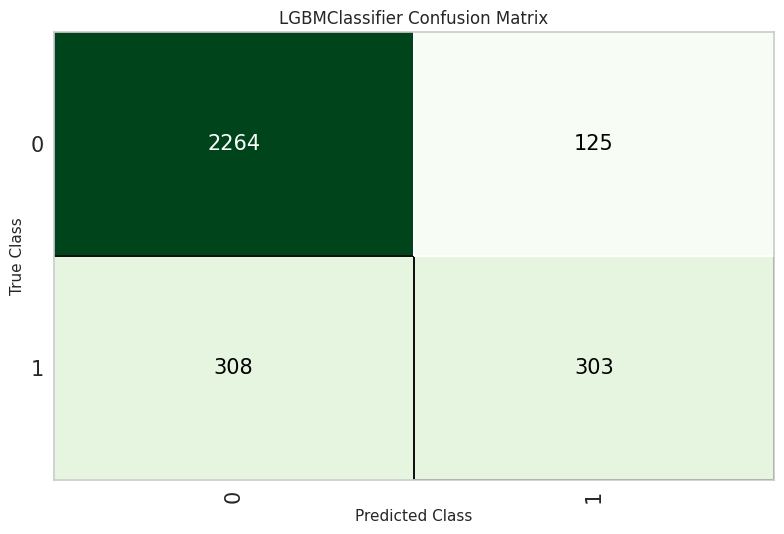

In [ ]:
plot_model(best, plot='confusion_matrix')

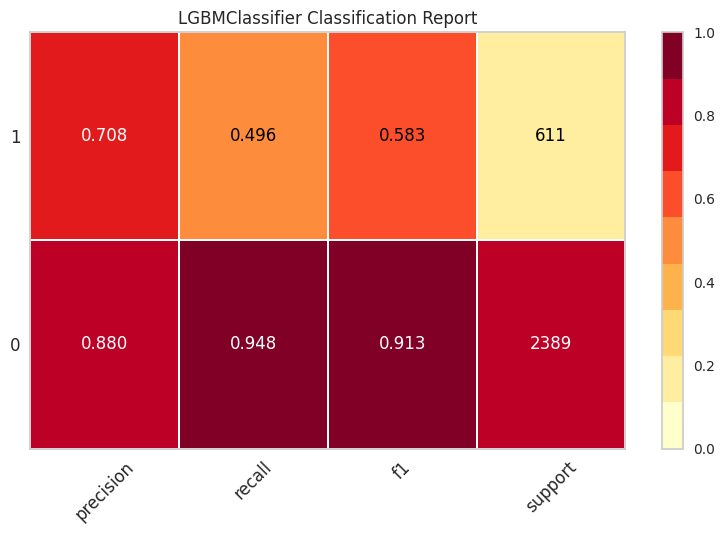

In [ ]:
plot_model(best, plot='class_report')

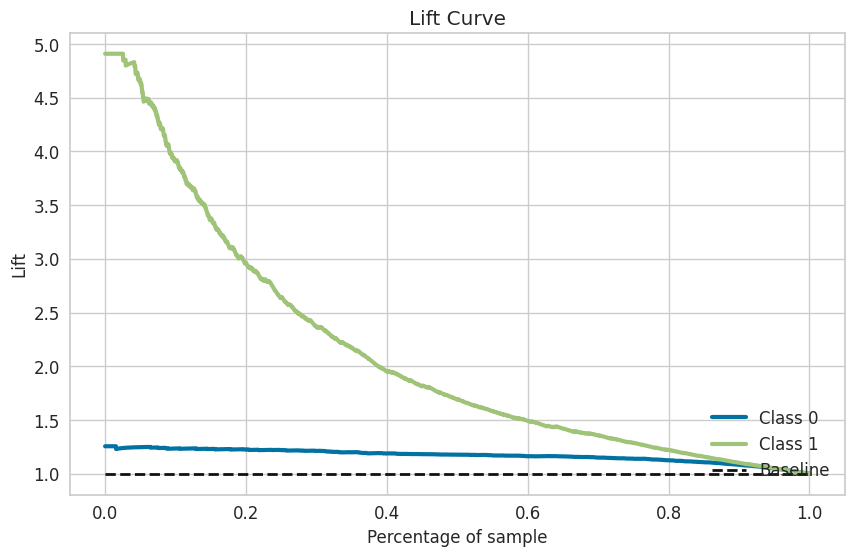

In [ ]:
plot_model(best, plot='lift')

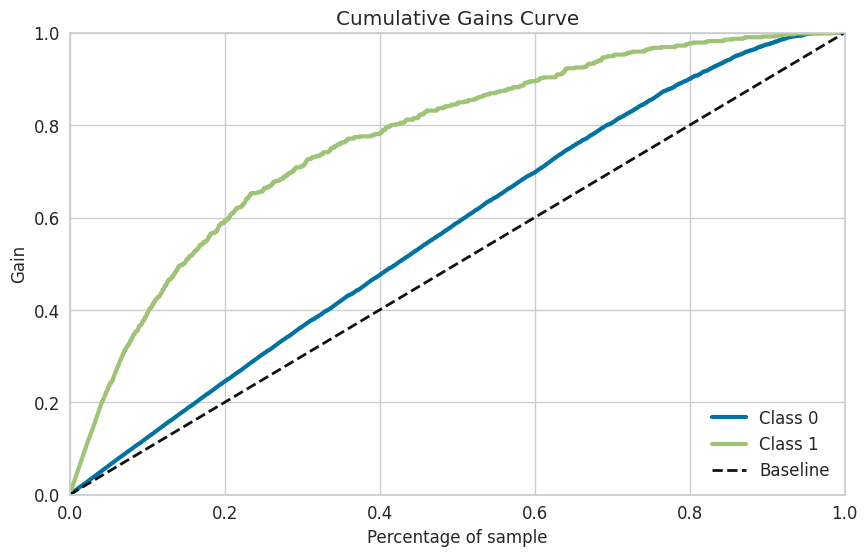

In [ ]:
plot_model(best, plot='gain')

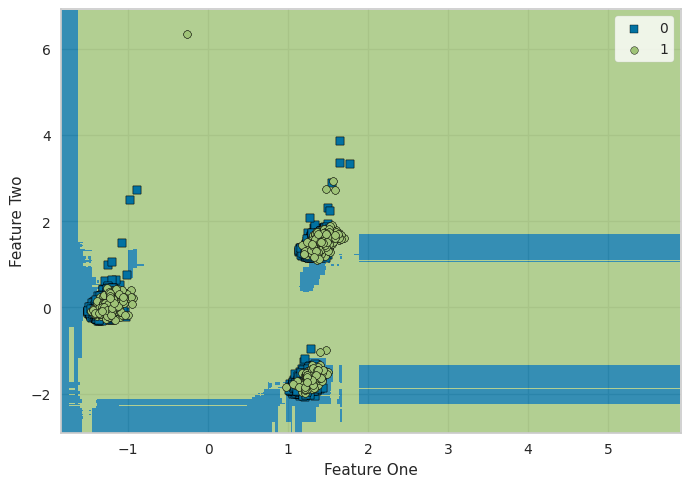

In [ ]:
plot_model(best, plot='boundary')

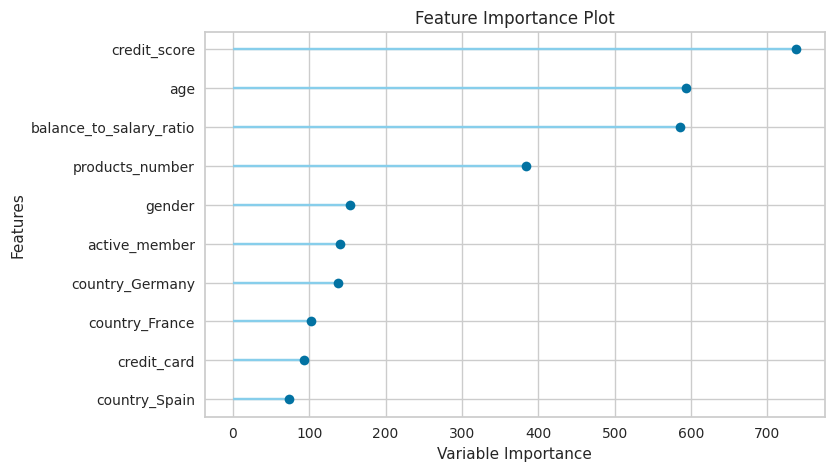

In [ ]:
plot_model(best, plot='feature_all')

---

### Model 3

In [ ]:
df = reset(file_path)

In [ ]:
exp22 = setup(df, target='churn', session_id=1, fix_imbalance=True, pca=True, ignore_features=['tenure', 'estimated_salary'])

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(14148, 11)"
5,Transformed train set shape,"(11148, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,6


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8489,0.8557,0.5932,0.6402,0.6150,0.5213,0.5223,1.7400
xgboost,Extreme Gradient Boosting,0.8377,0.8366,0.5589,0.6118,0.5836,0.4832,0.4842,0.8130
rf,Random Forest Classifier,0.8340,0.8339,0.5602,0.5994,0.5788,0.4756,0.4763,3.0580
et,Extra Trees Classifier,0.8314,0.8215,0.5357,0.5970,0.5636,0.4597,0.4614,1.9170
gbc,Gradient Boosting Classifier,0.8267,0.8601,0.6662,0.5642,0.6103,0.5000,0.5033,3.7040
ada,Ada Boost Classifier,0.8083,0.8410,0.6668,0.5230,0.5859,0.4636,0.4696,1.4280
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1410
dt,Decision Tree Classifier,0.7766,0.6918,0.5491,0.4599,0.5002,0.3578,0.3604,0.4310
qda,Quadratic Discriminant Analysis,0.7676,0.7991,0.6528,0.4515,0.5333,0.3854,0.3975,0.1340
lr,Logistic Regression,0.7167,0.7525,0.6795,0.3885,0.4941,0.3172,0.3413,0.1720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#### Plots

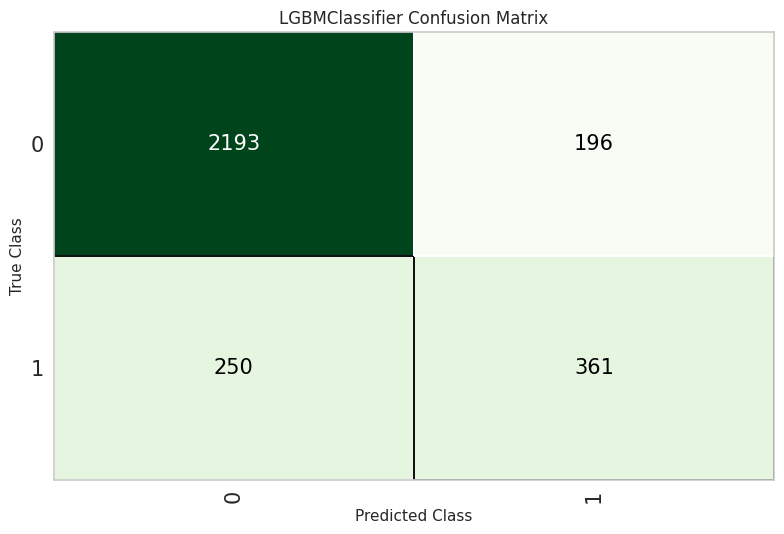

In [ ]:
plot_model(best, plot='confusion_matrix')

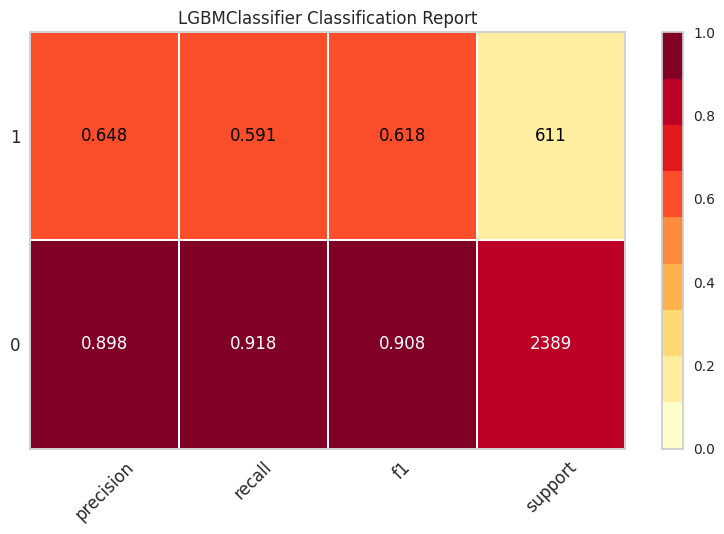

In [ ]:
plot_model(best, plot='class_report')

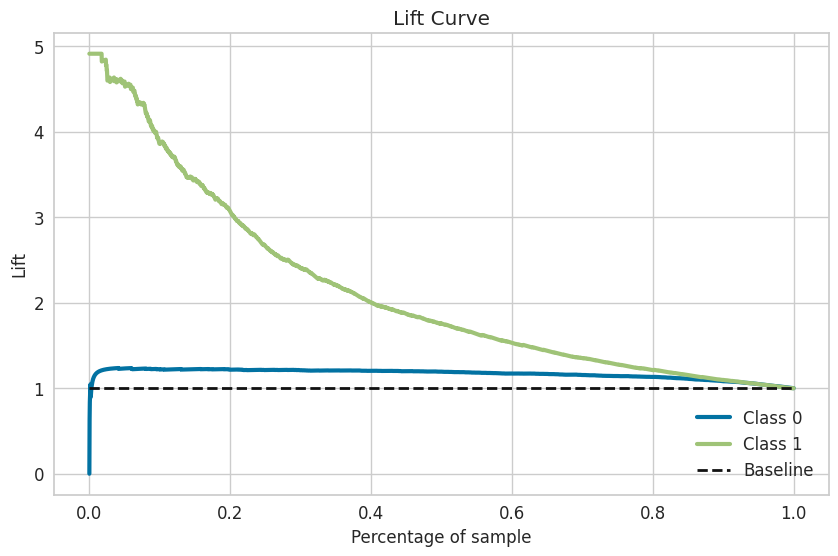

In [ ]:
plot_model(best, plot='lift')

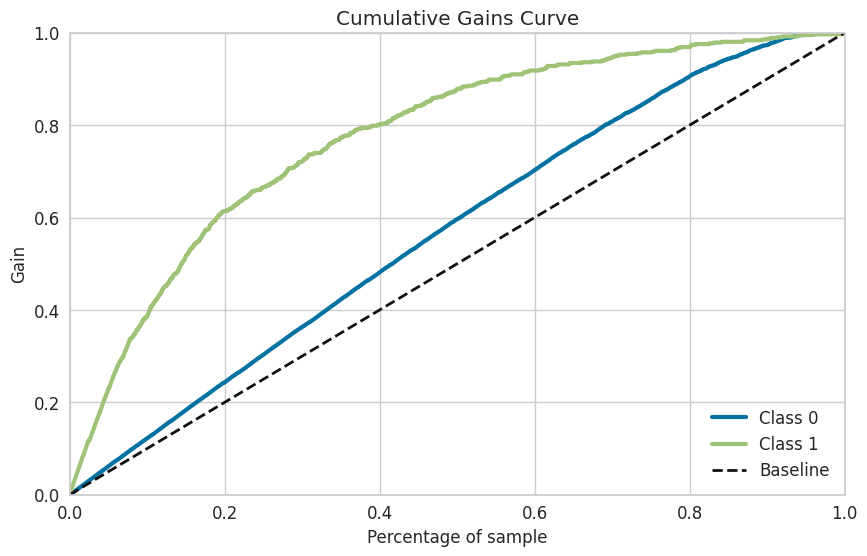

In [ ]:
plot_model(best, plot='gain')

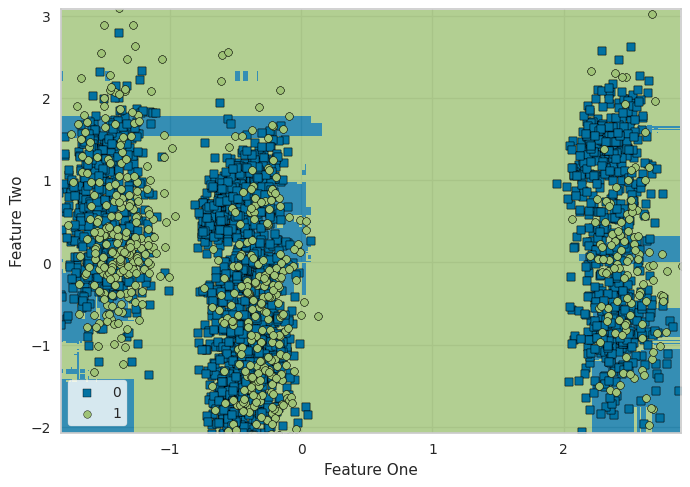

In [ ]:
plot_model(best, plot='boundary')

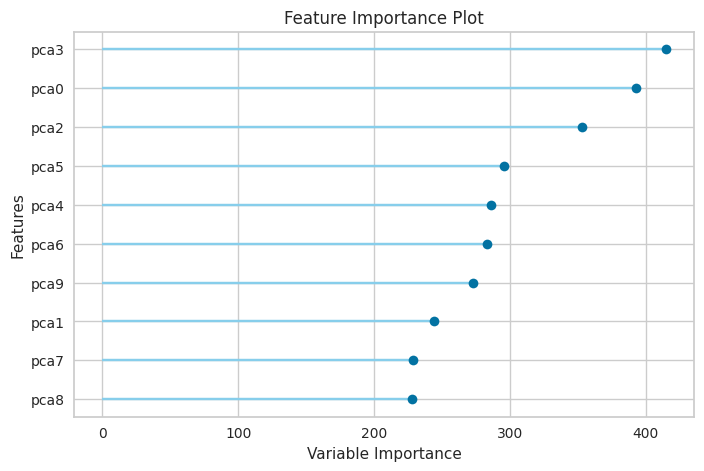

In [ ]:
plot_model(best, plot='feature_all')

---

### Model 4

In [ ]:
df = reset(file_path)

In [ ]:
exp23 = setup(df, target='churn', session_id=1, fix_imbalance=True, ignore_features=['tenure', 'estimated_salary'])

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(14148, 11)"
5,Transformed train set shape,"(11148, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,6


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8599,0.8619,0.5455,0.7002,0.6129,0.5290,0.5354,1.1180
gbc,Gradient Boosting Classifier,0.8587,0.8671,0.5406,0.6978,0.6087,0.5243,0.5309,1.9120
xgboost,Extreme Gradient Boosting,0.8544,0.8483,0.5350,0.6817,0.5993,0.5120,0.5177,0.6900
rf,Random Forest Classifier,0.8516,0.8380,0.5160,0.6783,0.5847,0.4967,0.5043,1.4500
ada,Ada Boost Classifier,0.8470,0.8500,0.5560,0.6451,0.5962,0.5027,0.5053,0.6690
et,Extra Trees Classifier,0.8450,0.8234,0.5118,0.6534,0.5725,0.4798,0.4860,0.8800
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1170
dt,Decision Tree Classifier,0.7937,0.6950,0.5287,0.4942,0.5102,0.3799,0.3806,0.2620
ridge,Ridge Classifier,0.7130,0.0000,0.6718,0.3838,0.4882,0.3091,0.3326,0.1270
lda,Linear Discriminant Analysis,0.7129,0.7662,0.6718,0.3836,0.4881,0.3088,0.3324,0.1840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#### Plots

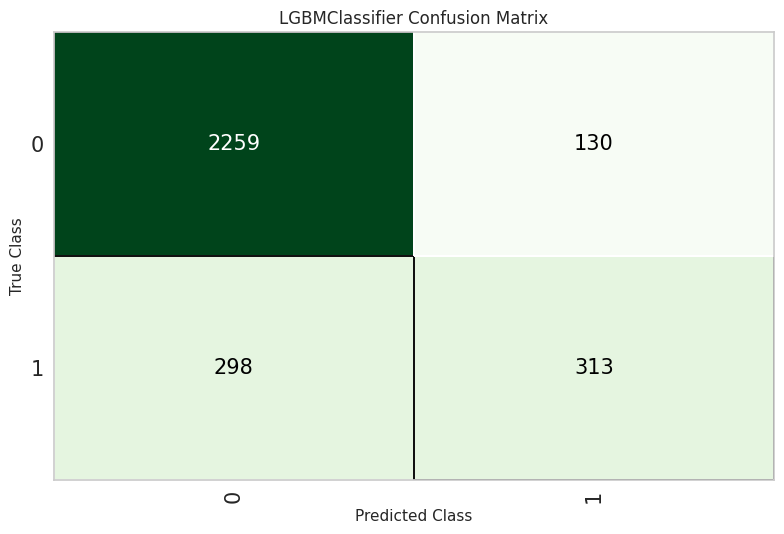

In [ ]:
plot_model(best, plot='confusion_matrix')

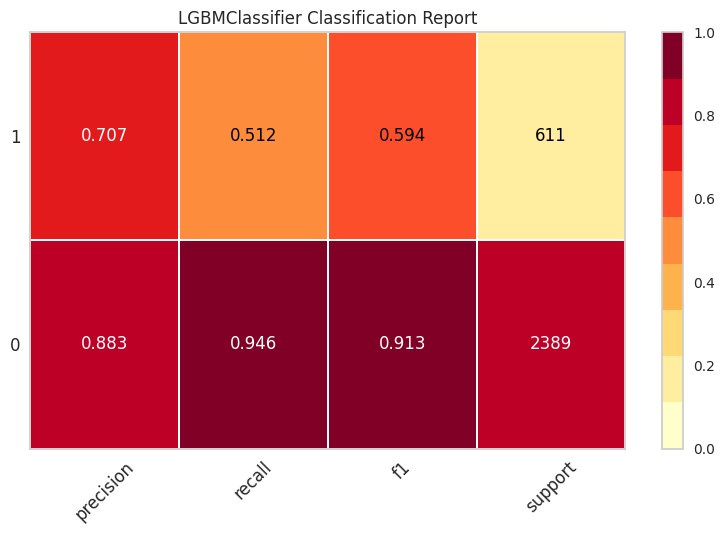

In [ ]:
plot_model(best, plot='class_report')

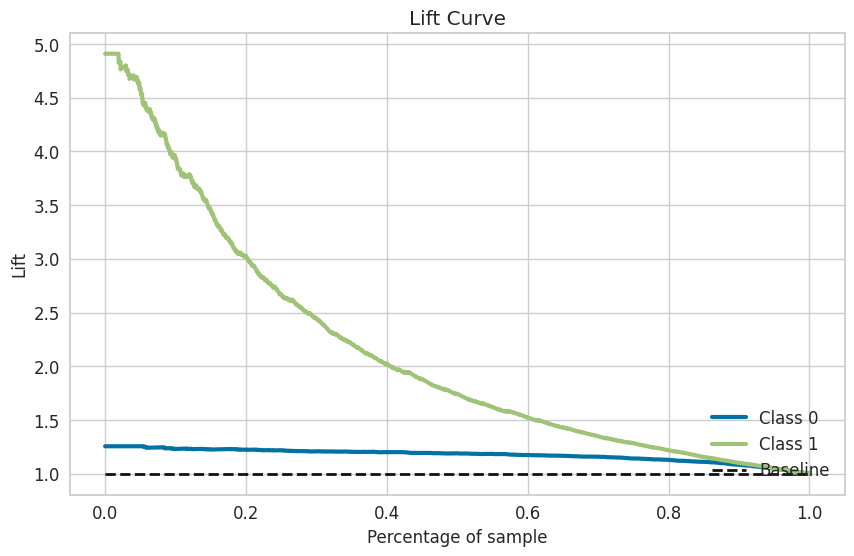

In [ ]:
plot_model(best, plot='lift')

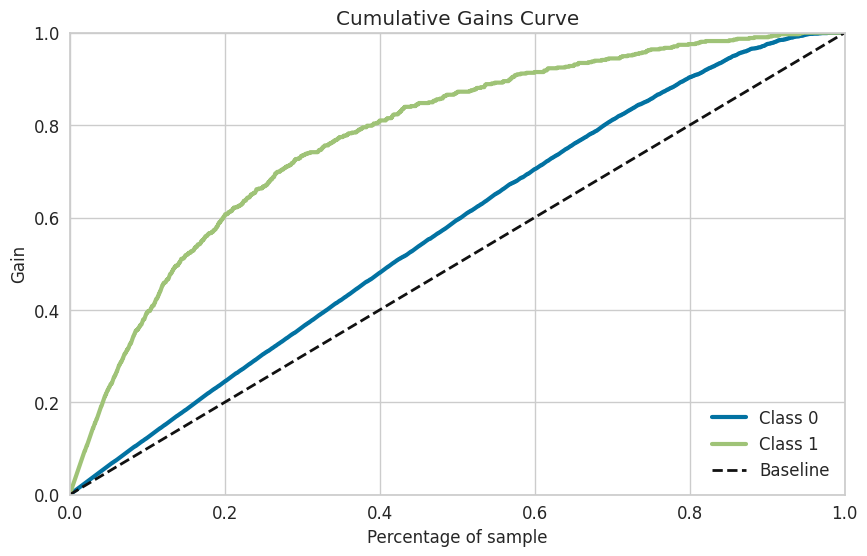

In [ ]:
plot_model(best, plot='gain')

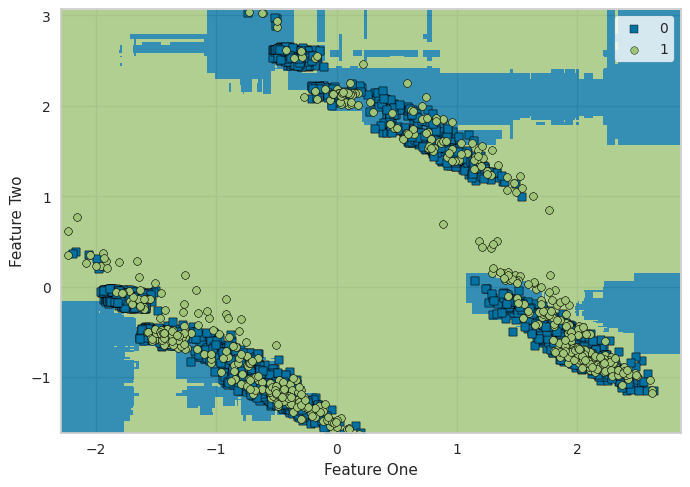

In [ ]:
plot_model(best, plot='boundary')

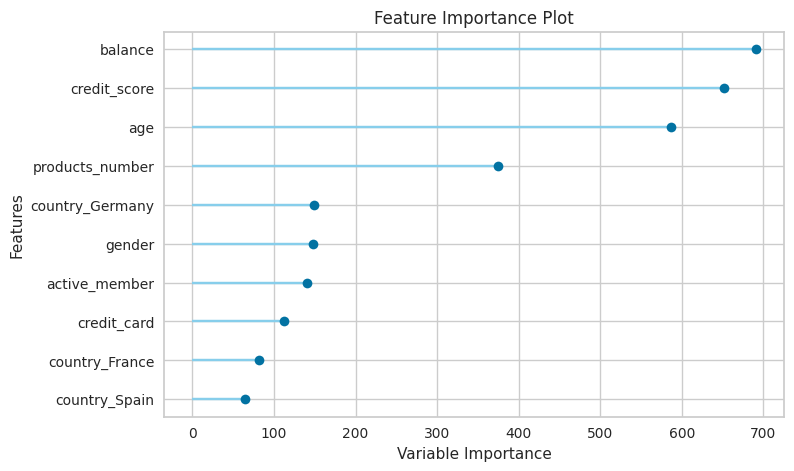

In [ ]:
plot_model(best, plot='feature_all')

---

## Is it even worth using a model for this problem?

We have 2037 people that churned.

In [ ]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

The mean balance is $76,485.89.

In [ ]:
df['balance'].mean()

76485.889288

The median balance is $97,198.54.

In [ ]:
df['balance'].median()

97198.54000000001

We can calculate the value of these customers by using the mean balance.  The churned customers account for a loss of $155 million.  It is *very* expensive to miss out on these customers, so we care a lot about keeping them.

In [ ]:
num_churned = 2037
med_balance = 76485.89
total_value_lost = num_churned*med_balance
print(total_value_lost)

155801757.93


At what point does the cost of trying to keep them outweigh the cost of letting them go?  If we were to use a dummy classifier, then all 10,000 customers have a cost associated with keeping them.  What is the cost at which it makes more sense to try and keep everyone, rather than a select few we believe might churn?

In [ ]:
155801757.93 / 10000

15580.175793

So if the cost of keeping 1 customer is less than $15,580.18, then we should just use a dummy and try to keep everyone.  If the cost of keeping 1 customer is greater than that number, we should try to develop a model to avoid wasting money.

---

In [ ]:
# Given data
average_account_balance = 76485.89
median_account_balance = 97198.54
cost_fn_lower = average_account_balance
cost_fn_upper = median_account_balance
cost_fn_avg = (cost_fn_lower + cost_fn_upper) / 2

# Model's confusion matrix
tn, fn, fp, tp = 58, 9, 2331, 602

# Assume cost of FP is half of the lower estimate (average account balance)
cost_fp = average_account_balance / 2

# Total cost for your model
total_cost_fn_model = fn * cost_fn_avg
total_cost_fp_model = fp * cost_fp
total_cost_model = total_cost_fn_model + total_cost_fp_model

# Total non-churn cases (for dummy classifier)
total_non_churn = tn + fp

# Total cost for dummy classifier
total_cost_fp_dummy = total_non_churn * cost_fp
total_cost_dummy = total_cost_fp_dummy  # FN cost is 0

total_cost_model, total_cost_dummy



(89925884.73, 91362395.605)

In [ ]:
cost_fn_avg

86842.215

In [ ]:
# Calculating the cost per false positive (FP) at which the model's cost equals the dummy classifier's cost

# The total cost difference between the model and the dummy classifier
total_cost_difference = total_cost_fp_dummy - total_cost_model

# The number of false positives in the model
num_fp_model = fp

# Calculating the threshold cost per FP where the model's total cost equals the dummy classifier's total cost
# The formula is: Total cost difference / Number of FP in the model
threshold_cost_per_fp = total_cost_difference / num_fp_model

threshold_cost_per_fp



616.2637816387817

Determining the max value at which we should use a dummy instead of the model.

In [12]:
# Redefining necessary variables and recalculating the maximum cost per FP

# Given data
total_cost_dummy_classifier = 91362395.605  # Total cost of using the dummy classifier
average_account_balance = 76485.89
median_account_balance = 97985.54

# Cost of FN (False Negative)
cost_fn_avg = (average_account_balance + median_account_balance) / 2  # Average cost of FN

# Model's confusion matrix values
fn = 9  # Number of false negatives
fp = 2331  # Number of false positives

# Fixed cost of false negatives in the model
fixed_cost_fn_model = fn * cost_fn_avg

# Calculating the maximum cost per FP
max_cost_per_fp = (total_cost_dummy_classifier - fixed_cost_fn_model) / fp

max_cost_per_fp

38857.689476619475

- - -

## Optimizing Models for Recall

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
expX = setup(data=df, target='churn', session_id=1, fix_imbalance=True, ignore_features=['tenure','estimated_salary'])

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(14148, 11)"
5,Transformed train set shape,"(11148, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,6


In [ ]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7843,0.5276,0.0634,0.3333,0.1065,0.0446,0.0650
1,0.6457,0.4648,0.1479,0.1419,0.1448,-0.0785,-0.0785
2,0.2571,0.4372,0.7394,0.1786,0.2877,-0.0581,-0.1384
3,0.7871,0.5121,0.0493,0.3333,0.0859,0.0355,0.0571
4,0.2157,0.4942,0.9650,0.2023,0.3345,-0.0048,-0.0296
5,0.7214,0.5818,0.3497,0.3289,0.3390,0.1627,0.1628
6,0.3629,0.5124,0.7622,0.2092,0.3283,0.0114,0.0209
7,0.2057,0.5009,1.0000,0.2046,0.3397,0.0007,0.0192
8,0.2143,0.4483,0.8392,0.1855,0.3038,-0.0463,-0.1630


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_qda = tune_model(qda, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.8187,0.7676,0.4467,0.5648,0.4146,0.4436
1,0.7386,0.8011,0.6761,0.4120,0.5120,0.3475,0.3674
2,0.7629,0.8111,0.7042,0.4464,0.5464,0.3966,0.4155
3,0.7343,0.7945,0.6338,0.4018,0.4918,0.3239,0.3394
4,0.7586,0.8109,0.7413,0.4454,0.5564,0.4044,0.4292
5,0.7814,0.8585,0.7692,0.4783,0.5898,0.4517,0.4754
6,0.7714,0.8267,0.7203,0.4619,0.5628,0.4179,0.4369
7,0.7386,0.7960,0.6923,0.4160,0.5197,0.3551,0.3768
8,0.7686,0.8213,0.7273,0.4581,0.5622,0.4157,0.4362


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6757,0.7598,0.7535,0.3579,0.4853,0.2899,0.3328
1,0.6900,0.7409,0.6901,0.3616,0.4746,0.2839,0.3138
2,0.6829,0.7420,0.7183,0.3592,0.4789,0.2857,0.3211
3,0.6757,0.7401,0.7042,0.3509,0.4684,0.2710,0.3050
4,0.6914,0.7533,0.7343,0.3710,0.4930,0.3041,0.3407
5,0.6986,0.7789,0.7063,0.3741,0.4891,0.3029,0.3337
6,0.7071,0.7914,0.7692,0.3901,0.5176,0.3382,0.3785
7,0.6814,0.7393,0.6783,0.3540,0.4652,0.2690,0.2978
8,0.6857,0.7696,0.7063,0.3620,0.4787,0.2857,0.3185


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_nb = tune_model(nb, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4886,0.5943,0.7042,0.2404,0.3584,0.0802,0.1129
1,0.4729,0.5885,0.8028,0.2505,0.3819,0.1052,0.1616
2,0.4586,0.5623,0.6972,0.2276,0.3432,0.0537,0.0788
3,0.4629,0.5441,0.6620,0.2227,0.3333,0.0427,0.0609
4,0.5043,0.6415,0.7972,0.2639,0.3965,0.1292,0.1877
5,0.4943,0.6018,0.7413,0.2506,0.3746,0.0996,0.1419
6,0.4614,0.5688,0.6783,0.2266,0.3398,0.0483,0.0695
7,0.4657,0.5452,0.6993,0.2320,0.3484,0.0601,0.0871
8,0.4957,0.6095,0.7203,0.2476,0.3685,0.0926,0.1300


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8586,0.8699,0.5423,0.6937,0.6087,0.5240,0.5299
1,0.8471,0.8475,0.4789,0.6733,0.5597,0.4704,0.4804
2,0.8557,0.8677,0.5563,0.6752,0.6100,0.5225,0.5262
3,0.8529,0.8505,0.4930,0.6931,0.5761,0.4902,0.5006
4,0.8471,0.8584,0.5245,0.6579,0.5837,0.4915,0.4962
5,0.8786,0.8972,0.6084,0.7500,0.6718,0.5983,0.6032
6,0.8586,0.8701,0.5385,0.7000,0.6087,0.5242,0.5309
7,0.8643,0.8701,0.5245,0.7353,0.6122,0.5328,0.5439
8,0.8643,0.8798,0.5944,0.6967,0.6415,0.5585,0.5611


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_gbc = tune_model(gbc, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7014,0.7233,0.6901,0.3726,0.4840,0.2994,0.3275
1,0.7057,0.6888,0.6127,0.3655,0.4579,0.2732,0.2904
2,0.6457,0.6833,0.7465,0.3333,0.4609,0.2507,0.2960
3,0.6514,0.6941,0.7113,0.3322,0.4529,0.2438,0.2819
4,0.6771,0.6672,0.6503,0.3457,0.4515,0.2519,0.2771
5,0.6757,0.6948,0.7063,0.3531,0.4709,0.2728,0.3069
6,0.6729,0.7243,0.8112,0.3648,0.5033,0.3083,0.3632
7,0.7214,0.7069,0.6434,0.3898,0.4855,0.3099,0.3282
8,0.6786,0.7129,0.7413,0.3605,0.4851,0.2900,0.3298


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6600,0.7077,0.6620,0.3310,0.4413,0.2342,0.2633
1,0.6543,0.6977,0.6620,0.3264,0.4372,0.2272,0.2568
2,0.6386,0.6855,0.6338,0.3093,0.4157,0.1967,0.2232
3,0.7043,0.7609,0.6901,0.3755,0.4864,0.3033,0.3310
4,0.6600,0.7085,0.6503,0.3310,0.4387,0.2303,0.2573
5,0.7243,0.7855,0.7063,0.4008,0.5114,0.3391,0.3655
6,0.6929,0.7504,0.7343,0.3723,0.4941,0.3060,0.3424
7,0.6429,0.6822,0.6014,0.3082,0.4076,0.1883,0.2099
8,0.6557,0.7115,0.7063,0.3367,0.4560,0.2479,0.2844


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr = tune_model(lr, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6600,0.7077,0.6620,0.3310,0.4413,0.2342,0.2633
1,0.6543,0.6977,0.6620,0.3264,0.4372,0.2272,0.2568
2,0.6386,0.6855,0.6338,0.3093,0.4157,0.1967,0.2232
3,0.7043,0.7612,0.6901,0.3755,0.4864,0.3033,0.3310
4,0.6600,0.7085,0.6503,0.3310,0.4387,0.2303,0.2573
5,0.7257,0.7853,0.7133,0.4032,0.5152,0.3439,0.3711
6,0.6929,0.7504,0.7343,0.3723,0.4941,0.3060,0.3424
7,0.6429,0.6822,0.6014,0.3082,0.4076,0.1883,0.2099
8,0.6557,0.7115,0.7063,0.3367,0.4560,0.2479,0.2844


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

---

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from itertools import combinations

In [ ]:
# Define the feature lists
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
binary_target = 'churn'

# Create combinations
all_combinations = list(combinations(numerical_features + categorical_features, 2))

# Plot each combination
for combination in all_combinations:
    feature1, feature2 = combination

    # Check if both features are numerical
    if feature1 in numerical_features and feature2 in numerical_features:
        sns.scatterplot(x=feature1, y=feature2, hue=binary_target, data=df)
    else:
        # Handle the case where at least one feature is categorical
        sns.boxplot(x=feature1, y=feature2, hue=binary_target, data=df) # or use sns.violinplot

    plt.title(f'{feature1} vs {feature2} by {binary_target}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

---

Simple Model
- Predit churn if credit_score < 400 or products_number > 2

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data' is your DataFrame and it's already loaded
# Your conditions for predicting churn
def predict_churn(row):
    if row['credit_score'] < 400 or row['products_number'] > 2:
        return 1
    else:
        return 0

# Apply the model to make predictions
df['predicted_churn'] = df.apply(predict_churn, axis=1)

# Actual vs Predicted
actual = df['churn']
predicted = df['predicted_churn']

# Calculate performance metrics
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)

print('Accuracy:', accuracy,
      '\nPrecision:',precision,
      '\nRecall:', recall,
      '\nF1:', f1)


Accuracy: 0.8213 
Precision: 0.8654970760233918 
Recall: 0.14531173294059893 
F1: 0.2488440521227407


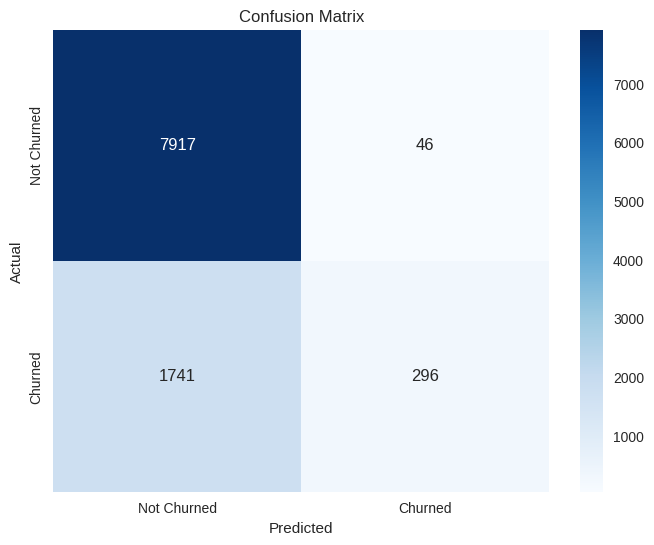

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'actual' and 'predicted' are already defined as your true labels and model predictions, respectively
cm = confusion_matrix(actual, predicted)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Quadratic Discriminant Analysis

In [ ]:
from imblearn.under_sampling import TomekLinks as TL

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,predicted_churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [ ]:
exp = setup(df, target='churn', session_id=1)

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 14)"
5,Transformed train set shape,"(7000, 14)"
6,Transformed test set shape,"(3000, 14)"
7,Ordinal features,1
8,Numeric features,9
9,Categorical features,2


In [ ]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2557,0.4902,0.9014,0.2016,0.3295,-0.0031,-0.0100
1,0.2257,0.4878,0.9366,0.1997,0.3292,-0.0078,-0.0348
2,0.2043,0.4876,0.9577,0.1980,0.3281,-0.0122,-0.0885
3,0.4629,0.5257,0.6761,0.2254,0.3380,0.0485,0.0698
4,0.2129,0.5054,1.0000,0.2061,0.3417,0.0044,0.0471
5,0.2114,0.5081,1.0000,0.2058,0.3413,0.0037,0.0430
6,0.2557,0.4962,0.9231,0.2056,0.3363,0.0032,0.0109
7,0.2014,0.4895,0.9720,0.2003,0.3321,-0.0100,-0.1066
8,0.3371,0.5390,0.8811,0.2199,0.3520,0.0371,0.0822


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

---

In [ ]:
exp = setup(df, target='churn', session_id=1, fix_imbalance=True,
            fix_imbalance_method=TL())

,Description,Value
0,Session id,1
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(9331, 14)"
5,Transformed train set shape,"(6331, 14)"
6,Transformed test set shape,"(3000, 14)"
7,Ordinal features,1
8,Numeric features,9
9,Categorical features,2


In [ ]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2557,0.4904,0.8803,0.1987,0.3243,-0.0101,-0.0306
1,0.4771,0.5601,0.7113,0.2371,0.3556,0.0738,0.1061
2,0.2129,0.5054,0.9930,0.2041,0.3385,0.0030,0.0260
3,0.2286,0.5127,0.9859,0.2065,0.3415,0.0090,0.0501
4,0.7557,0.5324,0.0490,0.1667,0.0757,-0.0188,-0.0236
5,0.2114,0.5019,0.9930,0.2049,0.3397,0.0016,0.0153
6,0.2100,0.5054,1.0000,0.2055,0.3409,0.0029,0.0384
7,0.2600,0.5016,0.9021,0.2038,0.3325,-0.0012,-0.0038
8,0.4329,0.5377,0.7273,0.2251,0.3438,0.0462,0.0720


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…